Joel Belsasar Huamani Ccallocunto - 20196510



<a target="_blank" href="https://colab.research.google.com/github/luccemhu/1-TAREA-1INT46-PUCP/blob/main/TAREA_1.ipynb#scrollTo=5cd47911">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Operations on Data Frames


Let me get the data on dengue from [Peru](https://www.datosabiertos.gob.pe/dataset/vigilancia-epidemiol%C3%B3gica-de-dengue):

# Tarea 1

## Analizando tablas

Elija para hoy: SOLO SEMANAS (ONE YEAR)

- [1.1 Usar R para obtener gráficas similares a las mostradas en clase pero para un solo año, analizando por semana.](#11-usar-r-para-obtener-gráficas-similares-a-las-mostradas-en-clase-pero-para-un-solo-año-analizando-por-semana)
- [1.2 Usar R para analizar otra data de este tipo (por ejemplo COVID) para un solo año analizando por semana.](#12-usar-r-para-analizar-otra-data-de-este-tipo-por-ejemplo-covid-para-un-solo-año-analizando-por-semana)
- [1.3 Usar cualquier otra data, donde los procesos de agrupamiento, merge, reshape, entre otros, sean claves.](#13-usar-cualquier-otra-data-donde-los-procesos-de-agrupamiento-merge-reshape-entre-otros-sean-claves)


Subir el LINK (a un html).

 # 1.1 Usar R para obtener gráficas similares a las mostradas en clase pero para un solo año, analizando por semana.

In [ ]:
import pandas as pd
linkData="https://github.com/SocialAnalytics-StrategicIntelligence/TableOperations/raw/main/dengue_ok.pkl"

dengue = pd.read_pickle(linkData)
dengue = dengue[dengue['ano'] == 2017]
# checking format
dengue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68279 entries, 257032 to 325310
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   departamento  68279 non-null  object  
 1   provincia     68279 non-null  object  
 2   distrito      68279 non-null  object  
 3   ano           68279 non-null  int64   
 4   semana        68279 non-null  int64   
 5   sexo          68279 non-null  object  
 6   edad          68279 non-null  int64   
 7   enfermedad    68279 non-null  category
 8   case          68279 non-null  int64   
dtypes: category(1), int64(4), object(4)
memory usage: 4.8+ MB


In [ ]:
# Each row is a person:
dengue.head()

departamento provincia   distrito   ano  semana sexo  edad  \
257032     AYACUCHO    HUANTA  LLOCHEGUA  2017       1    M    23   
257033     AYACUCHO    HUANTA  LLOCHEGUA  2017       1    M    31   
257034     AYACUCHO    HUANTA      SIVIA  2017       1    F    40   
257035        PIURA   SULLANA    SULLANA  2017       1    F    23   
257036        PIURA   SULLANA    SULLANA  2017       1    M    13   

         enfermedad  case  
257032  SIN_SEÑALES     1  
257033  SIN_SEÑALES     1  
257034  SIN_SEÑALES     1  
257035  SIN_SEÑALES     1  
257036       ALARMA     1

In [ ]:
# some exploration
dengue.describe().apply(lambda s: s.apply('{0:.5f}'.format))

ano       semana         edad         case
count  68279.00000  68279.00000  68279.00000  68279.00000
mean    2017.00000     18.81040     32.80856      1.00000
std        0.00000      7.46706     19.17166      0.00000
min     2017.00000      1.00000      1.00000      1.00000
25%     2017.00000     15.00000     17.00000      1.00000
50%     2017.00000     18.00000     30.00000      1.00000
75%     2017.00000     21.00000     46.00000      1.00000
max     2017.00000     52.00000    100.00000      1.00000

In [ ]:
# exploring
dengue.enfermedad.value_counts()

enfermedad
SIN_SEÑALES    60381
ALARMA          7664
GRAVE            234
Name: count, dtype: int64

Better labels:

In [ ]:
dengue['enfermedad_text']=dengue.enfermedad.astype(str)

dengue.replace({'enfermedad_text':{'SIN_SEÑALES':'1_SIN_SEÑALES','ALARMA':'2_ALARMA','GRAVE':'3_GRAVE'}},inplace=True)

In [ ]:
# exploring
dengue.ano.value_counts(sort=False)

ano
2017    68279
Name: count, dtype: int64

Discretizing:

In [ ]:
binLimits=[0,15,50,110]
theLabels=["a_menor_a_16","b_entre_16y50","c_mayor_a_50"]
dengue["edad_grupos"]=pd.cut(dengue['edad'], include_lowest=True,
                                     bins=binLimits,
                                     labels=theLabels,
                                     ordered=True)

# see

dengue.head()

departamento provincia   distrito   ano  semana sexo  edad  \
257032     AYACUCHO    HUANTA  LLOCHEGUA  2017       1    M    23   
257033     AYACUCHO    HUANTA  LLOCHEGUA  2017       1    M    31   
257034     AYACUCHO    HUANTA      SIVIA  2017       1    F    40   
257035        PIURA   SULLANA    SULLANA  2017       1    F    23   
257036        PIURA   SULLANA    SULLANA  2017       1    M    13   

         enfermedad  case enfermedad_text    edad_grupos  
257032  SIN_SEÑALES     1   1_SIN_SEÑALES  b_entre_16y50  
257033  SIN_SEÑALES     1   1_SIN_SEÑALES  b_entre_16y50  
257034  SIN_SEÑALES     1   1_SIN_SEÑALES  b_entre_16y50  
257035  SIN_SEÑALES     1   1_SIN_SEÑALES  b_entre_16y50  
257036       ALARMA     1        2_ALARMA   a_menor_a_16

The surface:

In [ ]:
pd.crosstab( dengue.enfermedad_text,dengue.edad_grupos, dropna=False, normalize='columns')

edad_grupos      a_menor_a_16  b_entre_16y50  c_mayor_a_50
enfermedad_text                                           
1_SIN_SEÑALES        0.889715       0.881938      0.885871
2_ALARMA             0.108391       0.114674      0.108938
3_GRAVE              0.001894       0.003388      0.005191

In [ ]:
pd.crosstab(dengue.enfermedad_text,[dengue.sexo,dengue.edad_grupos], dropna=False, normalize='columns')

sexo                       F                                       M  \
edad_grupos     a_menor_a_16 b_entre_16y50 c_mayor_a_50 a_menor_a_16   
enfermedad_text                                                        
1_SIN_SEÑALES       0.894228      0.872083     0.882274     0.885319   
2_ALARMA            0.104066      0.123799     0.113946     0.112604   
3_GRAVE             0.001706      0.004118     0.003780     0.002078   

sexo                                        
edad_grupos     b_entre_16y50 c_mayor_a_50  
enfermedad_text                             
1_SIN_SEÑALES        0.895127     0.890399  
2_ALARMA             0.102463     0.102634  
3_GRAVE              0.002411     0.006967

## Yearly look by weeks

In [ ]:
# for colab
#!pip install altair -U
#!pip install "vegafusion-jupyter[embed]"

In [ ]:
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [ ]:
alt_dengue=alt.Chart(dengue)

enc_dengue=alt_dengue.encode(
    x='semana:O',  # Usar 'semana' como eje x
    y='median(edad):Q',  # La mediana de la edad como eje y
    color='enfermedad_text:N',  # Colorear por tipo de enfermedad
    tooltip=['median(edad)', 'semana:O', 'enfermedad_text:N']  # Información adicional en el tooltip
)

enc_dengue.mark_line() + enc_dengue.mark_errorband()

alt.LayerChart(...)

In [ ]:
enc_dengue = alt.Chart(dengue).encode(
    x='semana:O',  # Usar 'semana' como eje x
    y='median(edad):Q',  # La mediana de la edad como eje y
    color='enfermedad_text:N',  # Colorear por tipo de enfermedad
    tooltip=['median(edad)', 'semana:O', 'enfermedad_text:N']  # Información adicional en el tooltip
).mark_line().interactive()

In [ ]:
# Crear facetas por 'sexo'
enc_dengue_facet = enc_dengue.facet(
    row='sexo:N'
)

# Mostrar el gráfico
enc_dengue_facet.display()

alt.FacetChart(...)

More detailed:

In [ ]:
enc_dengue=alt_dengue.encode(
    x='semana:O',  # Usar 'semana' como eje x
    y=alt.Y('sum(case):Q'),  # Sumar los casos como eje y
    color='enfermedad_text:N',  # Colorear por tipo de enfermedad
    tooltip=['sum(case):Q', 'semana:O']  # Información adicional en el tooltip
).mark_line().interactive()

enc_dengue.mark_line().facet(
    row='sexo:N',
    column='edad_grupos:N'
)

alt.FacetChart(...)

The previous plot may require a logged Y-axis:

In [ ]:
# Crear el gráfico utilizando Altair con escala logarítmica en el eje y
enc_dengue = alt.Chart(dengue).encode(
    x='semana:O',  # Usar 'semana' como eje x
    y=alt.Y('sum(case):Q', scale=alt.Scale(type='log')),  # Sumar los casos con escala logarítmica en el eje y
    color='enfermedad_text:N',  # Colorear por tipo de enfermedad
    tooltip=['sum(case):Q', 'semana:O']  # Información adicional en el tooltip
).mark_line().interactive()

# Crear facetas por 'sexo' y 'edad_grupos'
enc_dengue.mark_line().facet(
    row='sexo:N',
    column='edad_grupos:N'
)

alt.FacetChart(...)

Let's get the same results in tables:

In [ ]:
# Definir la lista de índices, incluyendo 'semana'
indexList = ['ano','semana', 'edad_grupos', 'sexo', 'enfermedad_text']

# Definir el diccionario de agregaciones
aggregator = {'edad': ['median']}

# Agrupar los datos por las variables especificadas y aplicar las agregaciones
LevelByYear_medians = dengue.groupby(indexList, observed=True).agg(aggregator)

# Mostrar la tabla resultante
LevelByYear_medians

edad
                                              median
ano  semana edad_grupos  sexo enfermedad_text       
2017 1      a_menor_a_16 F    1_SIN_SEÑALES      9.0
                              2_ALARMA           6.0
                         M    1_SIN_SEÑALES     11.0
                              2_ALARMA          12.5
                              3_GRAVE           11.0
...                                              ...
     52     c_mayor_a_50 F    1_SIN_SEÑALES     68.0
                              2_ALARMA          63.0
                         M    1_SIN_SEÑALES     59.5
                              2_ALARMA          62.0
                              3_GRAVE           69.0

[726 rows x 1 columns]

In [ ]:
LevelByYear_medians.unstack(['semana', 'sexo','enfermedad_text']) # Agregamos semana

edad                                          \
                          median                                           
semana                        1                                            
sexo                           F                              M            
enfermedad_text    1_SIN_SEÑALES 2_ALARMA 3_GRAVE 1_SIN_SEÑALES 2_ALARMA   
ano  edad_grupos                                                           
2017 a_menor_a_16            9.0      6.0     NaN          11.0     12.5   
     b_entre_16y50          35.5     32.0    24.0          29.0     18.0   
     c_mayor_a_50           61.0     54.0     NaN          60.0     55.0   

                                                                         ...  \
                                                                         ...   
semana                                2                                  ...   
sexo                                   F                              M  ...   
enfermedad_text    3_GRAVE 1_SIN_SEÑALES 2_ALARMA 3_GRAVE 1_SIN_SEÑALES  ...   
ano  edad_grupos                                                         ...   
2017 a_menor_a_16     11.0          13.0     12.5     NaN          10.0  ...   
     b_entre_16y50     NaN          33.0     23.0    16.0          28.0  ...   
     c_mayor_a_50      NaN          59.0     58.0     NaN          55.0  ...   

                                                                         \
                                                                          
semana                  51                                           52   
sexo                     F             M                              F   
enfermedad_text    3_GRAVE 1_SIN_SEÑALES 2_ALARMA 3_GRAVE 1_SIN_SEÑALES   
ano  edad_grupos                                                          
2017 a_menor_a_16     12.0           9.0     13.0     NaN          12.0   
     b_entre_16y50    22.5          27.0     35.5    36.0          25.0   
     c_mayor_a_50      NaN          59.0     73.0     NaN          68.0   

                                                                    
                                                                    
semana                                                              
sexo                                            M                   
enfermedad_text    2_ALARMA 3_GRAVE 1_SIN_SEÑALES 2_ALARMA 3_GRAVE  
ano  edad_grupos                                                    
2017 a_menor_a_16      10.5     NaN          11.5     11.0     NaN  
     b_entre_16y50     29.0    34.0          29.0     32.0    23.0  
     c_mayor_a_50      63.0     NaN          59.5     62.0    69.0  

[3 rows x 312 columns]

Notice the multi-index:

In [ ]:
LevelByYear_medians.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 726 entries, (2017, 1, 'a_menor_a_16', 'F', '1_SIN_SEÑALES') to (2017, 52, 'c_mayor_a_50', 'M', '3_GRAVE')
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (edad, median)  726 non-null    float64
dtypes: float64(1)
memory usage: 10.0+ KB


These are other possibilities, but not better than the lines:

In [ ]:
alt_dengue=alt.Chart(dengue)
enc_dengue=alt_dengue.encode(
    x='semana:O',  # Usar 'semana' como eje x, especificando que es ordinal
    y=alt.Y('sum(case):Q', scale=alt.Scale(type='log')),  # Sumar los casos con escala logarítmica en el eje y
    column='enfermedad_text:N'  # Crear columnas por tipo de enfermedad
)

enc_dengue.mark_circle()

alt.Chart(...)

In [ ]:
# Crear un gráfico usando Altair
alt_dengue = alt.Chart(dengue).mark_rule().encode(
    x='semana:T',  # Usar 'ano' como eje x, especificando que es temporal (año)
    y=alt.Y('sum(case):Q', scale=alt.Scale(type='log')),  # Sumar los casos con escala logarítmica en el eje y
    column='enfermedad_text:N'  # Crear columnas por tipo de enfermedad
).properties(
    title='Número de Casos de dengue por semanas en el 2017'  # Título del gráfico
)
alt_dengue

alt.Chart(...)

In [ ]:
alt_dengue=alt.Chart(dengue)
enc_dengue=alt_dengue.encode(
    x='semana:T',
    y=alt.Y('sum(case):Q', scale=alt.Scale(type='log')), # Logaritmo
    column='enfermedad_text:N',
)
enc_dengue.mark_bar()

alt.Chart(...)

Let's do some aggregation:

In [ ]:
indexList=['edad_grupos','ano','semana','sexo','enfermedad_text'] # Agregamos semana
aggregator={'edad': ['median','mean','min','max']}
LevelByYear_statsFull=dengue.groupby(indexList,observed=True).agg(aggregator)
LevelByYear_statsFull

edad                   
                                              median       mean min max
edad_grupos  ano  semana sexo enfermedad_text                          
a_menor_a_16 2017 1      F    1_SIN_SEÑALES      9.0   8.750000   1  15
                              2_ALARMA           6.0   7.111111   2  14
                         M    1_SIN_SEÑALES     11.0   9.684211   1  15
                              2_ALARMA          12.5  10.125000   2  14
                              3_GRAVE           11.0  11.000000  11  11
...                                              ...        ...  ..  ..
c_mayor_a_50 2017 52     F    1_SIN_SEÑALES     68.0  66.375000  51  78
                              2_ALARMA          63.0  62.666667  54  71
                         M    1_SIN_SEÑALES     59.5  63.666667  51  87
                              2_ALARMA          62.0  62.333333  57  68
                              3_GRAVE           69.0  69.000000  69  69

[726 rows x 4 columns]

Now, some reshaping:

In [ ]:
LevelByYear_statsFull.stack(future_stack=True) # agregamos luego del punto
# reshapin del aggregator edad: horizontal a vertical

edad
edad_grupos  ano  semana sexo enfermedad_text              
a_menor_a_16 2017 1      F    1_SIN_SEÑALES   median   9.00
                                              mean     8.75
                                              min      1.00
                                              max     15.00
                              2_ALARMA        median   6.00
...                                                     ...
c_mayor_a_50 2017 52     M    2_ALARMA        max     68.00
                              3_GRAVE         median  69.00
                                              mean    69.00
                                              min     69.00
                                              max     69.00

[2904 rows x 1 columns]

## Mining location

Let's use _departamento_ and _provincia_:

In [ ]:
indexList=['ano','semana','departamento','provincia','enfermedad_text']
aggregator={'case':['sum']} # Sum de casos de dengue
ByYearPlace=dengue.groupby(indexList,observed=True).agg(aggregator)
ByYearPlace

case
                                                           sum
ano  semana departamento provincia        enfermedad_text     
2017 1      AYACUCHO     HUANTA           1_SIN_SEÑALES      9
                                          2_ALARMA           2
                         LA MAR           1_SIN_SEÑALES      5
                                          2_ALARMA           2
            CAJAMARCA    CONTUMAZA        1_SIN_SEÑALES     16
...                                                        ...
     52     PIURA        MORROPON         1_SIN_SEÑALES      1
                         PIURA            1_SIN_SEÑALES     13
                         SULLANA          1_SIN_SEÑALES      9
            UCAYALI      CORONEL PORTILLO 1_SIN_SEÑALES     23
                                          2_ALARMA           3

[2626 rows x 1 columns]

Create a wide shape:

In [ ]:
#long to wide
ByYearPlace.unstack()
# El aggregate case pasó de vertical a horizontal: los 3 tipos de casos

case                 
                                                     sum                 
enfermedad_text                            1_SIN_SEÑALES 2_ALARMA 3_GRAVE
ano  semana departamento  provincia                                      
2017 1      AYACUCHO      HUANTA                     9.0      2.0     NaN
                          LA MAR                     5.0      2.0     NaN
            CAJAMARCA     CONTUMAZA                 16.0      NaN     NaN
            CUSCO         LA CONVENCION             18.0      3.0     NaN
            HUANUCO       LEONCIO PRADO              1.0      NaN     NaN
...                                                  ...      ...     ...
     52     MADRE DE DIOS TAMBOPATA                 33.0     21.0     2.0
            PIURA         MORROPON                   1.0      NaN     NaN
                          PIURA                     13.0      NaN     NaN
                          SULLANA                    9.0      NaN     NaN
            UCAYALI       CORONEL PORTILLO          23.0      3.0     NaN

[1795 rows x 3 columns]

In [ ]:
# no missing values
ByYearPlace_wide=ByYearPlace.unstack().fillna(0)
ByYearPlace_wide

case                 
                                                     sum                 
enfermedad_text                            1_SIN_SEÑALES 2_ALARMA 3_GRAVE
ano  semana departamento  provincia                                      
2017 1      AYACUCHO      HUANTA                     9.0      2.0     0.0
                          LA MAR                     5.0      2.0     0.0
            CAJAMARCA     CONTUMAZA                 16.0      0.0     0.0
            CUSCO         LA CONVENCION             18.0      3.0     0.0
            HUANUCO       LEONCIO PRADO              1.0      0.0     0.0
...                                                  ...      ...     ...
     52     MADRE DE DIOS TAMBOPATA                 33.0     21.0     2.0
            PIURA         MORROPON                   1.0      0.0     0.0
                          PIURA                     13.0      0.0     0.0
                          SULLANA                    9.0      0.0     0.0
            UCAYALI       CORONEL PORTILLO          23.0      3.0     0.0

[1795 rows x 3 columns]

The idea is get the sgare of people in ALARM status. For that we need this:

In [ ]:
sumCases=ByYearPlace_wide.sum(axis=1)
sumCases

ano   semana  departamento   provincia       
2017  1       AYACUCHO       HUANTA              11.0
                             LA MAR               7.0
              CAJAMARCA      CONTUMAZA           16.0
              CUSCO          LA CONVENCION       21.0
              HUANUCO        LEONCIO PRADO        1.0
                                                 ... 
      52      MADRE DE DIOS  TAMBOPATA           56.0
              PIURA          MORROPON             1.0
                             PIURA               13.0
                             SULLANA              9.0
              UCAYALI        CORONEL PORTILLO    26.0
Length: 1795, dtype: float64

In [ ]:
# here you are:
shareAlarma=ByYearPlace_wide.loc[:,('case','sum','2_ALARMA')]/sumCases
shareAlarma.name='shareAlarma'
shareAlarma

ano   semana  departamento   provincia       
2017  1       AYACUCHO       HUANTA              0.181818
                             LA MAR              0.285714
              CAJAMARCA      CONTUMAZA           0.000000
              CUSCO          LA CONVENCION       0.142857
              HUANUCO        LEONCIO PRADO       0.000000
                                                   ...   
      52      MADRE DE DIOS  TAMBOPATA           0.375000
              PIURA          MORROPON            0.000000
                             PIURA               0.000000
                             SULLANA             0.000000
              UCAYALI        CORONEL PORTILLO    0.115385
Name: shareAlarma, Length: 1795, dtype: float64

No multi index:

In [ ]:
shareAlarma=shareAlarma.reset_index()
shareAlarma

ano  semana   departamento         provincia  shareAlarma
0     2017       1       AYACUCHO            HUANTA     0.181818
1     2017       1       AYACUCHO            LA MAR     0.285714
2     2017       1      CAJAMARCA         CONTUMAZA     0.000000
3     2017       1          CUSCO     LA CONVENCION     0.142857
4     2017       1        HUANUCO     LEONCIO PRADO     0.000000
...    ...     ...            ...               ...          ...
1790  2017      52  MADRE DE DIOS         TAMBOPATA     0.375000
1791  2017      52          PIURA          MORROPON     0.000000
1792  2017      52          PIURA             PIURA     0.000000
1793  2017      52          PIURA           SULLANA     0.000000
1794  2017      52        UCAYALI  CORONEL PORTILLO     0.115385

[1795 rows x 5 columns]

Let's find thwe worst province per Region in one year:

In [ ]:
where = shareAlarma.groupby(['ano','semana','departamento'])['shareAlarma'].idxmax()
worst_prov_year = shareAlarma.loc[where].reset_index(drop=True)
worst_prov_year

ano  semana   departamento         provincia  shareAlarma
0    2017       1       AYACUCHO            LA MAR     0.285714
1    2017       1      CAJAMARCA         CONTUMAZA     0.000000
2    2017       1          CUSCO     LA CONVENCION     0.142857
3    2017       1        HUANUCO     LEONCIO PRADO     0.000000
4    2017       1            ICA             PALPA     0.000000
..    ...     ...            ...               ...          ...
752  2017      52           LIMA              LIMA     1.000000
753  2017      52         LORETO           REQUENA     1.000000
754  2017      52  MADRE DE DIOS         TAMBOPATA     0.375000
755  2017      52          PIURA          MORROPON     0.000000
756  2017      52        UCAYALI  CORONEL PORTILLO     0.115385

[757 rows x 5 columns]

In [ ]:
worst_prov_year.shareAlarma.describe()

count    757.000000
mean       0.240214
std        0.330670
min        0.000000
25%        0.000000
50%        0.062500
75%        0.375000
max        1.000000
Name: shareAlarma, dtype: float64

In [ ]:
# amount of worst provinces per region
len(worst_prov_year.provincia.value_counts())

65

In [ ]:
# amount of worst provinces per region - cleaner
len(worst_prov_year[worst_prov_year.shareAlarma>0].provincia.value_counts())

62

Some filtering:

In [ ]:
worst_ProvYear_alarma=worst_prov_year[worst_prov_year.shareAlarma>0].loc[:,['departamento','provincia']]
worst_ProvYear_alarma.reset_index(drop=True,inplace=True)
worst_ProvYear_alarma

departamento         provincia
0         AYACUCHO            LA MAR
1            CUSCO     LA CONVENCION
2      LA LIBERTAD            CHEPEN
3           LORETO            MAYNAS
4    MADRE DE DIOS         TAMBOPATA
..             ...               ...
449    LA LIBERTAD          TRUJILLO
450           LIMA              LIMA
451         LORETO           REQUENA
452  MADRE DE DIOS         TAMBOPATA
453        UCAYALI  CORONEL PORTILLO

[454 rows x 2 columns]

In [ ]:
indexList=['departamento','provincia']
aggregator={'provincia':['count']}
worst_ProvYear_alarma_Frequency=worst_ProvYear_alarma.groupby(indexList,observed=True).agg(aggregator)
worst_ProvYear_alarma_Frequency

provincia
                                  count
departamento provincia                 
AMAZONAS     UTCUBAMBA                2
ANCASH       CASMA                    1
             SANTA                   15
AYACUCHO     HUAMANGA                 1
             HUANTA                  17
...                                 ...
TUMBES       TUMBES                  12
             ZARUMILLA                5
UCAYALI      ATALAYA                 18
             CORONEL PORTILLO        17
             PADRE ABAD               6

[62 rows x 1 columns]

The count informs how many years a province was the most affected:

In [ ]:
worst_ProvYear_alarma_Frequency.describe()

provincia
           count
count  62.000000
mean    7.322581
std     7.460880
min     1.000000
25%     2.000000
50%     5.000000
75%    11.000000
max    32.000000

In [ ]:
# final look
worst_ProvYear_alarma_Frequency.columns=['weeksAffected']
worst_ProvYear_alarma_Frequency=worst_ProvYear_alarma_Frequency[worst_ProvYear_alarma_Frequency.weeksAffected>2]
worst_ProvYear_alarma_Frequency.reset_index(inplace=True)
worst_ProvYear_alarma_Frequency

departamento              provincia  weeksAffected
0          ANCASH                  SANTA             15
1        AYACUCHO                 HUANTA             17
2        AYACUCHO                 LA MAR             21
3           CUSCO          LA CONVENCION             27
4         HUANUCO          LEONCIO PRADO             12
5             ICA                    ICA              7
6             ICA                  NAZCA              3
7             ICA                  PALPA             15
8           JUNIN            CHANCHAMAYO             12
9           JUNIN                 SATIPO              6
10    LA LIBERTAD                 ASCOPE              4
11    LA LIBERTAD                 CHEPEN             11
12    LA LIBERTAD              PACASMAYO              6
13    LA LIBERTAD               TRUJILLO             13
14    LA LIBERTAD                   VIRU              3
15     LAMBAYEQUE               CHICLAYO             16
16     LAMBAYEQUE             LAMBAYEQUE              4
17           LIMA                   LIMA             11
18         LORETO      DATEM DEL MARAÑON              4
19         LORETO                 LORETO              5
20         LORETO                 MAYNAS             32
21         LORETO                REQUENA              5
22  MADRE DE DIOS                   MANU              3
23  MADRE DE DIOS              TAHUAMANU              3
24  MADRE DE DIOS              TAMBOPATA             32
25          PIURA            HUANCABAMBA              5
26          PIURA                  PAITA             15
27          PIURA                  PIURA              3
28          PIURA                SECHURA             11
29          PIURA                SULLANA              8
30          PIURA                 TALARA              5
31     SAN MARTIN               HUALLAGA              3
32     SAN MARTIN       MARISCAL CACERES             10
33     SAN MARTIN              MOYOBAMBA              6
34     SAN MARTIN             SAN MARTIN              6
35     SAN MARTIN                TOCACHE              4
36         TUMBES  CONTRALMIRANTE VILLAR              5
37         TUMBES                 TUMBES             12
38         TUMBES              ZARUMILLA              5
39        UCAYALI                ATALAYA             18
40        UCAYALI       CORONEL PORTILLO             17
41        UCAYALI             PADRE ABAD              6

Let's plot:

In [ ]:
alt_worstProv=alt.Chart(worst_ProvYear_alarma_Frequency)

enc_worstProv=alt_worstProv.encode(
    y='departamento:N',  # Eje y basado en el departamento
    x='provincia:N',  # Eje x basado en la provincia
    text='weeksAffected:O',  # Texto que muestra los años afectados
    size='weeksAffected:O'  # Tamaño del texto basado en los años afectados
)

enc_worstProv.mark_text()

alt.Chart(...)

Let's try another info:

In [ ]:
indexList=['ano','semana','departamento','enfermedad_text']
aggregator={'case':['sum']}
ByYearDepa=dengue.groupby(indexList,observed=True).agg(aggregator)
ByYearDepa_wide=ByYearDepa.unstack().fillna(0)
ByYearDepaAlarm=ByYearDepa_wide.loc[:,('case','sum','2_ALARMA')]/ByYearDepa_wide.sum(axis=1)
ByYearDepaAlarm.name='alarmShare'

ByYearDepaAlarm=ByYearDepaAlarm.reset_index()
ByYearDepaAlarm

ano  semana   departamento  alarmShare
0    2017       1       AYACUCHO    0.222222
1    2017       1      CAJAMARCA    0.000000
2    2017       1          CUSCO    0.142857
3    2017       1        HUANUCO    0.000000
4    2017       1            ICA    0.000000
..    ...     ...            ...         ...
752  2017      52           LIMA    1.000000
753  2017      52         LORETO    0.478261
754  2017      52  MADRE DE DIOS    0.375000
755  2017      52          PIURA    0.000000
756  2017      52        UCAYALI    0.115385

[757 rows x 4 columns]

In [ ]:
ByYearDepaAlarm.describe()

ano      semana  alarmShare
count   757.0  757.000000  757.000000
mean   2017.0   25.394980    0.122590
std       0.0   14.666437    0.184344
min    2017.0    1.000000    0.000000
25%    2017.0   13.000000    0.000000
50%    2017.0   24.000000    0.040000
75%    2017.0   38.000000    0.166667
max    2017.0   52.000000    1.000000

In [ ]:
ByYearDepaAlarm_focus=ByYearDepaAlarm[ByYearDepaAlarm.alarmShare>0]

In [ ]:
ByYearDepaAlarm_focus.describe()

ano      semana  alarmShare
count   454.0  454.000000  454.000000
mean   2017.0   22.991189    0.204407
std       0.0   14.144942    0.199880
min    2017.0    1.000000    0.003367
25%    2017.0   12.000000    0.058824
50%    2017.0   21.000000    0.142857
75%    2017.0   34.000000    0.285714
max    2017.0   52.000000    1.000000

In [ ]:
edges=[-1, .10, .25, .5,1]
theLabels=["a.below10%","b.11-25%","c.26-50%","d.above50%"]
ByYearDepaAlarm_focus.loc[:,"alarmLevels"]=pd.cut(ByYearDepaAlarm_focus['alarmShare'],
                                            include_lowest=True,
                                            bins=edges,
                                            labels=theLabels,
                                            ordered=True)

##
ByYearDepaAlarm_focus.head()

C:\Users\user\AppData\Local\Temp\ipykernel_21612\504289943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ByYearDepaAlarm_focus.loc[:,"alarmLevels"]=pd.cut(ByYearDepaAlarm_focus['alarmShare'],


ano  semana   departamento  alarmShare alarmLevels
0  2017       1       AYACUCHO    0.222222    b.11-25%
2  2017       1          CUSCO    0.142857    b.11-25%
6  2017       1    LA LIBERTAD    1.000000  d.above50%
7  2017       1         LORETO    0.153846    b.11-25%
8  2017       1  MADRE DE DIOS    0.250000    b.11-25%

In [ ]:
alt_WorstDepa=alt.Chart(ByYearDepaAlarm_focus).encode(x='semana:O',
                                                      y=alt.Y('departamento:N',
                                                              sort=alt.EncodingSortField(field='alarmShare',op='max',order='descending')))
enc1_WorstDepa=alt_WorstDepa.encode(
    color=alt.Color('alarmLevels:O').scale(scheme="lightgreyred", reverse=False)
)

enc1_WorstDepa.mark_rect()

alt.Chart(...)

In [ ]:
enc2_WorstDepa=alt_WorstDepa.encode(
    text=alt.Text('alarmShare:Q', format=".1f"),
    opacity=alt.condition('datum.alarmShare >= 0.3', alt.value(1), alt.value(0)))
enc2_WorstDepa.mark_text(fontStyle='bold')

alt.Chart(...)

In [ ]:
enc1_WorstDepa.mark_rect() + enc2_WorstDepa.mark_text()

alt.LayerChart(...)

You can find different color schemes [here](https://vega.github.io/vega/docs/schemes/)

Fin de la tarea 1.1

# 1.2 Usar R para analizar otra data de este tipo (por ejemplo COVID) para un solo año analizando por semana.

In [ ]:
import pandas as pd

# Definir la ruta al archivo en el entorno de Colab
file_path = 'delitos-2018-23.pkl'

# Importar el archivo .pkl
delitos_all = pd.read_pickle(file_path)
delitos_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144988 entries, 0 to 1144987
Data columns (total 27 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   coordenadas     1144988 non-null  object 
 1   tiempo          1144988 non-null  float64
 2   latitud         1144988 non-null  float64
 3   longitud        1144988 non-null  float64
 4   anio            1144988 non-null  float64
 5   mes             1144988 non-null  float64
 6   dia             1144988 non-null  float64
 7   turno           1144988 non-null  object 
 8   ubigeo          1144988 non-null  object 
 9   id_comisaria    1144988 non-null  float64
 10  comisaria       1144988 non-null  object 
 11  id_dpto         1144988 non-null  object 
 12  departamento    1144988 non-null  object 
 13  id_provincia    1144988 non-null  object 
 14  provincia       1144988 non-null  object 
 15  id_distrito     1144988 non-null  object 
 16  distrito        1144988 non-null  ob

In [ ]:
selected_columns = [
    'tiempo', 'anio', 'mes', 'dia', 'turno',
    'departamento', 'provincia', 'distrito',
    'tipo_delito', 'subtipo', 'modalidad',
    'macroregion', 'region_pol', 'ubigeo'
]
# Filtrar el DataFrame para incluir solo las columnas seleccionadas
delitos = delitos_all[selected_columns]

delitos = delitos[delitos['tipo_delito'] == 'PATRIMONIO (DELITO)']

# Agregar una columna 'case' con valor constante de 1
delitos['case'] = 1

# Convertir las columnas 'anio', 'mes', y 'dia' a tipo entero
columns_to_convert = ['anio', 'mes', 'dia', 'ubigeo']
delitos[columns_to_convert] = delitos[columns_to_convert].astype(int)

In [ ]:
# Each row is a person:
delitos.head()

tiempo  anio  mes  dia  turno departamento provincia distrito  \
0  1.681171e+12  2023    4   11  noche       CALLAO    CALLAO   CALLAO   
4  1.682208e+12  2023    4   23  noche       CALLAO    CALLAO   CALLAO   
5  1.682294e+12  2023    4   24  noche       CALLAO    CALLAO   CALLAO   
6  1.682294e+12  2023    4   24  noche       CALLAO    CALLAO   CALLAO   
8  1.682467e+12  2023    4   26  noche       CALLAO    CALLAO   CALLAO   

           tipo_delito      subtipo    modalidad macroregion region_pol  \
0  PATRIMONIO (DELITO)  RECEPTACION  RECEPTACION      CALLAO     CALLAO   
4  PATRIMONIO (DELITO)        HURTO        HURTO      CALLAO     CALLAO   
5  PATRIMONIO (DELITO)        HURTO        HURTO      CALLAO     CALLAO   
6  PATRIMONIO (DELITO)  RECEPTACION  RECEPTACION      CALLAO     CALLAO   
8  PATRIMONIO (DELITO)  RECEPTACION  RECEPTACION      CALLAO     CALLAO   

   ubigeo  case  
0   70101     1  
4   70101     1  
5   70101     1  
6   70101     1  
8   70101     1

In [ ]:
# some exploration
delitos.describe().apply(lambda s: s.apply('{0:.5f}'.format))

tiempo          anio           mes           dia  \
count         871465.00000  871465.00000  871465.00000  871465.00000   
mean   1641551631109.45361    2021.54842       6.10790      18.18921   
std      58808509042.18203       1.85553       3.02282       8.24144   
min    1514764800000.00000    2018.00000       1.00000       1.00000   
25%    1597104000000.00000    2020.00000       5.00000      11.00000   
50%    1676678400000.00000    2023.00000       5.00000      22.00000   
75%    1684886400000.00000    2023.00000       8.00000      24.00000   
max    1703980800000.00000    2023.00000      12.00000      31.00000   

             ubigeo          case  
count  871465.00000  871465.00000  
mean   152440.19231       1.00000  
std     53273.54118       0.00000  
min     10101.00000       1.00000  
25%    140101.00000       1.00000  
50%    150132.00000       1.00000  
75%    200101.00000       1.00000  
max    250401.00000       1.00000

In [ ]:
# exploring
delitos.turno.value_counts()

turno
mañana       415045
noche        177056
tarde        163777
madrugada    115587
Name: count, dtype: int64

In [ ]:
delitos['turno_text']=delitos.turno.astype(str)

delitos.replace({'turno_text':{'mañana':'1_mañana','noche':'2_noche','tarde':'3_tarde','madrugada':'4_madrugada'}},inplace=True)

In [ ]:
# exploring
delitos.anio.value_counts(sort=False)

anio
2023    455048
2022    102596
2018    107335
2021     74210
2020     51791
2019     80485
Name: count, dtype: int64

In [ ]:
unique_days = delitos['mes'].unique()

# Mostrar los valores únicos
print(unique_days)

[ 4  5  1  2  9  6  3 10  8 11 12  7]


In [ ]:
# la variable 'dia'
# Define los límites para los intervalos de días en el mes
day_binLimits = [0, 10, 20, 31]  # Intervalos: 1-10, 11-20, 21-30
day_theLabels = ["a_1_a_10", "b_11_a_20", "c_21_a_31"]

# Crear una nueva columna 'dia_grupos' con las etiquetas de los intervalos
delitos['dia_grupos'] = pd.cut(delitos['dia'],
                           bins=day_binLimits,
                           labels=day_theLabels,
                           include_lowest=True,
                           right=False)

In [ ]:
pd.crosstab(delitos.turno_text,delitos.dia_grupos, dropna=False, normalize='columns')

dia_grupos   a_1_a_10  b_11_a_20  c_21_a_31
turno_text                                 
1_mañana     0.249628   0.251037   0.663374
2_noche      0.289293   0.290988   0.130968
3_tarde      0.267133   0.270118   0.121133
4_madrugada  0.193947   0.187857   0.084525

In [ ]:
# for colab
# !pip install altair -U
# !pip install "vegafusion-jupyter[embed]"

In [ ]:
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

## Delitos patrimoniales Yearly look

In [ ]:

alt_delitos=alt.Chart(delitos)

enc_delitos=alt_delitos.encode(
    x='anio:T',
    y=alt.Y('sum(case):Q', scale=alt.Scale(type='log')),  # Eje Y para la suma de casos con escala logarítmica
)
enc_delitos.mark_line()

alt.Chart(...)

In [ ]:
alt_delitos=alt.Chart(delitos)

enc_delitos=alt_delitos.encode(
    x='anio:T',
    y=alt.Y('sum(case):Q', scale=alt.Scale(type='log')),  # Eje Y para la suma de casos con escala logarítmica
    color='turno_text:N',
)
enc_delitos.mark_line()

alt.Chart(...)

In [ ]:
enc_delitos=alt_delitos.encode(
    x='anio:T',
    y=alt.Y('sum(case):Q', scale=alt.Scale(type='log')),  # Eje Y para la suma de casos con escala logarítmica
    color='turno_text:N',
    tooltip=['sum(case):Q','anio:T']
).interactive()
enc_delitos.mark_line().facet(
    column='dia_grupos:N'
)

alt.FacetChart(...)

In [ ]:
# Crear el gráfico
alt_delitos = alt.Chart(delitos).properties(
    width=400,  # Ajusta el ancho del gráfico
    height=400  # Ajusta la altura del gráfico, opcional
)

# Configurar la codificación y el tipo de gráfico
enc_delitos = alt_delitos.encode(
    x='anio:T',  # Eje X para los años # opcional cambiar por mes o dia
    y=alt.Y('sum(case):Q', scale=alt.Scale(type='log')),  # Eje Y para la suma de casos con escala logarítmica
    column='turno_text:N'  # Crear columnas para cada turno
)

# Añadir el tipo de marca
chart = enc_delitos.mark_bar()
# opcional aplicar: enc_delitos.mark_circle() o enc_delitos.mark_rule()

# Mostrar el gráfico
chart

alt.Chart(...)

## Mining location

Let's use departamento and provincia:

In [ ]:
indexList=['anio','departamento','provincia','turno_text']
aggregator={'case':['sum']}
ByYearPlace=delitos.groupby(indexList,observed=True).agg(aggregator)
ByYearPlace

case
                                          sum
anio departamento provincia  turno_text      
2018 AMAZONAS     BAGUA      1_mañana      16
                             2_noche       14
                             3_tarde       21
                             4_madrugada   12
                  BONGARA    3_tarde        1
...                                       ...
2023 UCAYALI      PADRE ABAD 2_noche       63
                             3_tarde       83
                             4_madrugada   55
                  PURUS      1_mañana       2
                             4_madrugada    1

[2899 rows x 1 columns]

In [ ]:
#long to wide
ByYearPlace.unstack()

case                            
                                            sum                            
turno_text                             1_mañana 2_noche 3_tarde 4_madrugada
anio departamento provincia                                                
2018 AMAZONAS     BAGUA                    16.0    14.0    21.0        12.0
                  BONGARA                   NaN     NaN     1.0         NaN
                  CHACHAPOYAS              31.0    17.0    33.0        26.0
                  LUYA                      2.0     1.0     1.0         NaN
                  RODRIGUEZ DE MENDOZA      NaN     NaN     NaN         1.0
...                                         ...     ...     ...         ...
2023 TUMBES       ZARUMILLA                 1.0     NaN     1.0         NaN
     UCAYALI      ATALAYA                   3.0     NaN     1.0         4.0
                  CORONEL PORTILLO        340.0   327.0   313.0       331.0
                  PADRE ABAD               95.0    63.0    83.0        55.0
                  PURUS                     2.0     NaN     NaN         1.0

[859 rows x 4 columns]

In [ ]:
# no missing values
ByYearPlace_wide=ByYearPlace.unstack().fillna(0)
ByYearPlace_wide

case                            
                                            sum                            
turno_text                             1_mañana 2_noche 3_tarde 4_madrugada
anio departamento provincia                                                
2018 AMAZONAS     BAGUA                    16.0    14.0    21.0        12.0
                  BONGARA                   0.0     0.0     1.0         0.0
                  CHACHAPOYAS              31.0    17.0    33.0        26.0
                  LUYA                      2.0     1.0     1.0         0.0
                  RODRIGUEZ DE MENDOZA      0.0     0.0     0.0         1.0
...                                         ...     ...     ...         ...
2023 TUMBES       ZARUMILLA                 1.0     0.0     1.0         0.0
     UCAYALI      ATALAYA                   3.0     0.0     1.0         4.0
                  CORONEL PORTILLO        340.0   327.0   313.0       331.0
                  PADRE ABAD               95.0    63.0    83.0        55.0
                  PURUS                     2.0     0.0     0.0         1.0

[859 rows x 4 columns]

## BY MONTH

In [ ]:
# Por mes
indexList=['anio','mes','departamento','provincia','turno_text']
aggregator={'case':['sum']}
ByMonthPlace=delitos.groupby(indexList,observed=True).agg(aggregator)
ByMonthPlace

case
                                                    sum
anio mes departamento provincia        turno_text      
2018 1   AMAZONAS     BAGUA            4_madrugada    1
         ANCASH       AIJA             2_noche        1
                      BOLOGNESI        1_mañana       3
                      CARHUAZ          1_mañana       1
                                       3_tarde        2
...                                                 ...
2023 12  UCAYALI      CORONEL PORTILLO 4_madrugada   34
                      PADRE ABAD       1_mañana      10
                                       2_noche        4
                                       3_tarde        2
                                       4_madrugada    5

[20255 rows x 1 columns]

In [ ]:
#long to wide
ByMonthPlace.unstack()

case                            
                                            sum                            
turno_text                             1_mañana 2_noche 3_tarde 4_madrugada
anio mes departamento provincia                                            
2018 1   AMAZONAS     BAGUA                 NaN     NaN     NaN         1.0
         ANCASH       AIJA                  NaN     1.0     NaN         NaN
                      BOLOGNESI             3.0     NaN     NaN         NaN
                      CARHUAZ               1.0     NaN     2.0         NaN
                      CASMA                 1.0     NaN     NaN         NaN
...                                         ...     ...     ...         ...
2023 12  TACNA        TACNA                91.0    92.0    80.0        59.0
                      TARATA                1.0     1.0     NaN         NaN
         TUMBES       TUMBES                9.0    13.0    12.0         8.0
         UCAYALI      CORONEL PORTILLO     31.0    14.0    22.0        34.0
                      PADRE ABAD           10.0     4.0     2.0         5.0

[6738 rows x 4 columns]

In [ ]:
# no missing values
ByMonthPlace_wide=ByYearPlace.unstack().fillna(0)
ByMonthPlace_wide

case                            
                                            sum                            
turno_text                             1_mañana 2_noche 3_tarde 4_madrugada
anio departamento provincia                                                
2018 AMAZONAS     BAGUA                    16.0    14.0    21.0        12.0
                  BONGARA                   0.0     0.0     1.0         0.0
                  CHACHAPOYAS              31.0    17.0    33.0        26.0
                  LUYA                      2.0     1.0     1.0         0.0
                  RODRIGUEZ DE MENDOZA      0.0     0.0     0.0         1.0
...                                         ...     ...     ...         ...
2023 TUMBES       ZARUMILLA                 1.0     0.0     1.0         0.0
     UCAYALI      ATALAYA                   3.0     0.0     1.0         4.0
                  CORONEL PORTILLO        340.0   327.0   313.0       331.0
                  PADRE ABAD               95.0    63.0    83.0        55.0
                  PURUS                     2.0     0.0     0.0         1.0

[859 rows x 4 columns]

## BY DAY

In [ ]:

indexList=['anio','dia','departamento','provincia','turno_text']
aggregator={'case':['sum']}
ByDayPlace=delitos.groupby(indexList,observed=True).agg(aggregator)
ByDayPlace

case
                                                    sum
anio dia departamento provincia        turno_text      
2018 1   AMAZONAS     CHACHAPOYAS      1_mañana       1
                                       2_noche        2
                                       3_tarde        1
         ANCASH       BOLOGNESI        1_mañana       1
                                       2_noche        1
...                                                 ...
2023 31  UCAYALI      CORONEL PORTILLO 3_tarde       11
                                       4_madrugada   10
                      PADRE ABAD       1_mañana       2
                                       2_noche        1
                                       3_tarde        1

[43625 rows x 1 columns]

In [ ]:
#long to wide
ByDayPlace.unstack()

case                            
                                            sum                            
turno_text                             1_mañana 2_noche 3_tarde 4_madrugada
anio dia departamento provincia                                            
2018 1   AMAZONAS     CHACHAPOYAS           1.0     2.0     1.0         NaN
         ANCASH       BOLOGNESI             1.0     1.0     NaN         NaN
                      CARHUAZ               1.0     2.0     NaN         NaN
                      CASMA                 1.0     NaN     NaN         NaN
                      CORONGO               NaN     NaN     1.0         NaN
...                                         ...     ...     ...         ...
2023 31  TACNA        JORGE BASADRE         1.0     NaN     NaN         NaN
                      TACNA                21.0    26.0    22.0        13.0
         TUMBES       TUMBES                4.0     3.0     1.0         4.0
         UCAYALI      CORONEL PORTILLO      6.0     3.0    11.0        10.0
                      PADRE ABAD            2.0     1.0     1.0         NaN

[16047 rows x 4 columns]

In [ ]:
# no missing values
ByDayPlace_wide=ByYearPlace.unstack().fillna(0)
ByDayPlace_wide

case                            
                                            sum                            
turno_text                             1_mañana 2_noche 3_tarde 4_madrugada
anio departamento provincia                                                
2018 AMAZONAS     BAGUA                    16.0    14.0    21.0        12.0
                  BONGARA                   0.0     0.0     1.0         0.0
                  CHACHAPOYAS              31.0    17.0    33.0        26.0
                  LUYA                      2.0     1.0     1.0         0.0
                  RODRIGUEZ DE MENDOZA      0.0     0.0     0.0         1.0
...                                         ...     ...     ...         ...
2023 TUMBES       ZARUMILLA                 1.0     0.0     1.0         0.0
     UCAYALI      ATALAYA                   3.0     0.0     1.0         4.0
                  CORONEL PORTILLO        340.0   327.0   313.0       331.0
                  PADRE ABAD               95.0    63.0    83.0        55.0
                  PURUS                     2.0     0.0     0.0         1.0

[859 rows x 4 columns]

## The idea is get the sgare of people in ALARM status. For that we need this:

### Para los departamentos por años y delitos patrimoniales por las mañanas

- Especial enfasis en 2023 porque ahí aumentaron los robos en las mañanas
- En los años anteriores los robos ocurrían mayormente en las noches y en las tardes

In [ ]:
sumCases=ByYearPlace_wide.sum(axis=1)
sumCases

anio  departamento  provincia           
2018  AMAZONAS      BAGUA                     63.0
                    BONGARA                    1.0
                    CHACHAPOYAS              107.0
                    LUYA                       4.0
                    RODRIGUEZ DE MENDOZA       1.0
                                             ...  
2023  TUMBES        ZARUMILLA                  2.0
      UCAYALI       ATALAYA                    8.0
                    CORONEL PORTILLO        1311.0
                    PADRE ABAD               296.0
                    PURUS                      3.0
Length: 859, dtype: float64

In [ ]:
# here you are:
shareManana=ByYearPlace_wide.loc[:,('case','sum','1_mañana')]/sumCases
shareManana.name='shareManana'
shareManana

anio  departamento  provincia           
2018  AMAZONAS      BAGUA                   0.253968
                    BONGARA                 0.000000
                    CHACHAPOYAS             0.289720
                    LUYA                    0.500000
                    RODRIGUEZ DE MENDOZA    0.000000
                                              ...   
2023  TUMBES        ZARUMILLA               0.500000
      UCAYALI       ATALAYA                 0.375000
                    CORONEL PORTILLO        0.259344
                    PADRE ABAD              0.320946
                    PURUS                   0.666667
Name: shareManana, Length: 859, dtype: float64

In [ ]:
shareManana=shareManana.reset_index()
shareManana

anio departamento             provincia  shareManana
0    2018     AMAZONAS                 BAGUA     0.253968
1    2018     AMAZONAS               BONGARA     0.000000
2    2018     AMAZONAS           CHACHAPOYAS     0.289720
3    2018     AMAZONAS                  LUYA     0.500000
4    2018     AMAZONAS  RODRIGUEZ DE MENDOZA     0.000000
..    ...          ...                   ...          ...
854  2023       TUMBES             ZARUMILLA     0.500000
855  2023      UCAYALI               ATALAYA     0.375000
856  2023      UCAYALI      CORONEL PORTILLO     0.259344
857  2023      UCAYALI            PADRE ABAD     0.320946
858  2023      UCAYALI                 PURUS     0.666667

[859 rows x 4 columns]

In [ ]:
where = shareManana.groupby(['anio','departamento'])['shareManana'].idxmax()
Manana_prov_year = shareManana.loc[where].reset_index(drop=True)
Manana_prov_year # Donde ocurren mas DP en las mañanas

anio departamento             provincia  shareManana
0    2018     AMAZONAS                  LUYA     0.500000
1    2018       ANCASH                 OCROS     0.833333
2    2018     APURIMAC              AYMARAES     0.500000
3    2018     AREQUIPA            CONDESUYOS     0.500000
4    2018     AYACUCHO  PAUCAR DEL SARA SARA     0.555556
..    ...          ...                   ...          ...
143  2023         PUNO              AZANGARO     0.292929
144  2023   SAN MARTIN              HUALLAGA     0.444444
145  2023        TACNA                TARATA     0.416667
146  2023       TUMBES             ZARUMILLA     0.500000
147  2023      UCAYALI                 PURUS     0.666667

[148 rows x 4 columns]

In [ ]:
Manana_prov_year.shareManana.describe()


count    148.000000
mean       0.505290
std        0.263259
min        0.000000
25%        0.315789
50%        0.472136
75%        0.619048
max        1.000000
Name: shareManana, dtype: float64

In [ ]:
# amount of worst provinces per region
len(Manana_prov_year.provincia.value_counts())

88

In [ ]:
# amount of worst provinces per region - cleaner
len(Manana_prov_year[Manana_prov_year.shareManana>0].provincia.value_counts())

87

Some filtering:



In [ ]:
Manana_prov_year_manana=Manana_prov_year[Manana_prov_year.shareManana>0].loc[:,['departamento','provincia']]
Manana_prov_year_manana.reset_index(drop=True,inplace=True)
Manana_prov_year_manana

departamento             provincia
0       AMAZONAS                  LUYA
1         ANCASH                 OCROS
2       APURIMAC              AYMARAES
3       AREQUIPA            CONDESUYOS
4       AYACUCHO  PAUCAR DEL SARA SARA
..           ...                   ...
139         PUNO              AZANGARO
140   SAN MARTIN              HUALLAGA
141        TACNA                TARATA
142       TUMBES             ZARUMILLA
143      UCAYALI                 PURUS

[144 rows x 2 columns]

In [ ]:
indexList=['departamento','provincia']
aggregator={'provincia':['count']}
Manana_prov_year_manana_Frequency=Manana_prov_year_manana.groupby(indexList,observed=True).agg(aggregator)
Manana_prov_year_manana_Frequency

provincia
                                      count
departamento provincia                     
AMAZONAS     CHACHAPOYAS                  1
             LUYA                         2
             RODRIGUEZ DE MENDOZA         1
ANCASH       ANTONIO RAYMONDI             1
             ASUNCION                     1
...                                     ...
TUMBES       TUMBES                       4
             ZARUMILLA                    2
UCAYALI      CORONEL PORTILLO             3
             PADRE ABAD                   2
             PURUS                        1

[87 rows x 1 columns]

The count informs how many years a province was the most affected in the morning by DP:

In [ ]:
Manana_prov_year_manana_Frequency.describe()


provincia
           count
count  87.000000
mean    1.655172
std     1.009577
min     1.000000
25%     1.000000
50%     1.000000
75%     2.000000
max     6.000000

In [ ]:
# final look
Manana_prov_year_manana_Frequency.columns=['yearsAffected']
Manana_prov_year_manana_Frequency=Manana_prov_year_manana_Frequency[Manana_prov_year_manana_Frequency.yearsAffected>2]
Manana_prov_year_manana_Frequency.reset_index(inplace=True)
Manana_prov_year_manana_Frequency

departamento               provincia  yearsAffected
0          ANCASH                   OCROS              3
1        AREQUIPA                CAYLLOMA              3
2          CALLAO                  CALLAO              6
3         HUANUCO                    AMBO              3
4           JUNIN                 CHUPACA              3
5      LAMBAYEQUE                CHICLAYO              3
6      LAMBAYEQUE               FERREÑAFE              3
7          LORETO                  MAYNAS              3
8   MADRE DE DIOS               TAHUAMANU              3
9        MOQUEGUA   GENERAL SANCHEZ CERRO              5
10          PASCO  DANIEL ALCIDES CARRION              3
11          PIURA                 AYABACA              3
12           PUNO                AZANGARO              4
13          TACNA           JORGE BASADRE              3
14         TUMBES                  TUMBES              4
15        UCAYALI        CORONEL PORTILLO              3

Let's plot:



In [ ]:
alt_mananaProv=alt.Chart(Manana_prov_year_manana_Frequency)

enc_mananaProv=alt_mananaProv.encode(
    y='departamento',
    x='provincia',
    text='yearsAffected:O',
    size='yearsAffected:O'
)

enc_mananaProv.mark_text()

alt.Chart(...)

## Let's try another info:

In [ ]:
indexList=['anio','departamento','turno_text']
aggregator={'case':['sum']}
ByMananaDepa=delitos.groupby(indexList,observed=True).agg(aggregator)
ByMananaDepa_wide=ByMananaDepa.unstack().fillna(0)
ByMananaDepaAlarm=ByMananaDepa_wide.loc[:,('case','sum','1_mañana')]/ByMananaDepa_wide.sum(axis=1)
ByMananaDepaAlarm.name='mananaShare'

ByMananaDepaAlarm=ByMananaDepaAlarm.reset_index()
ByMananaDepaAlarm

anio departamento  mananaShare
0    2018     AMAZONAS     0.287179
1    2018       ANCASH     0.255558
2    2018     APURIMAC     0.269231
3    2018     AREQUIPA     0.209047
4    2018     AYACUCHO     0.294643
..    ...          ...          ...
143  2023         PUNO     0.267521
144  2023   SAN MARTIN     0.246667
145  2023        TACNA     0.294522
146  2023       TUMBES     0.239198
147  2023      UCAYALI     0.271941

[148 rows x 3 columns]

In [ ]:
ByMananaDepaAlarm.describe()


anio  mananaShare
count   148.000000   148.000000
mean   2020.500000     0.264699
std       1.724178     0.109349
min    2018.000000     0.000000
25%    2019.000000     0.225257
50%    2020.500000     0.258338
75%    2022.000000     0.285151
max    2023.000000     1.000000

In [ ]:
ByMananaDepaAlarm_focus=ByMananaDepaAlarm[ByMananaDepaAlarm.mananaShare>0]

In [ ]:
ByMananaDepaAlarm_focus.describe()

anio  mananaShare
count   144.000000   144.000000
mean   2020.520833     0.272051
std       1.733942     0.101378
min    2018.000000     0.133333
25%    2019.000000     0.226287
50%    2021.000000     0.258870
75%    2022.000000     0.286735
max    2023.000000     1.000000

In [ ]:
edges=[-1, .10, .25, .5,1]
theLabels=["a.below10%","b.11-25%","c.26-50%","d.above50%"]
ByMananaDepaAlarm_focus.loc[:,"mananaLevels"]=pd.cut(ByMananaDepaAlarm_focus['mananaShare'],
                                            include_lowest=True,
                                            bins=edges,
                                            labels=theLabels,
                                            ordered=True)

##
ByMananaDepaAlarm_focus.head()

C:\Users\user\AppData\Local\Temp\ipykernel_21612\2707099607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ByMananaDepaAlarm_focus.loc[:,"mananaLevels"]=pd.cut(ByMananaDepaAlarm_focus['mananaShare'],


anio departamento  mananaShare mananaLevels
0  2018     AMAZONAS     0.287179     c.26-50%
1  2018       ANCASH     0.255558     c.26-50%
2  2018     APURIMAC     0.269231     c.26-50%
3  2018     AREQUIPA     0.209047     b.11-25%
4  2018     AYACUCHO     0.294643     c.26-50%

In [ ]:
alt_MananaDepa=alt.Chart(ByMananaDepaAlarm_focus).encode(x='anio:O',
                                                      y=alt.Y('departamento:N',
                                                              sort=alt.EncodingSortField(field='mananaShare',op='max',order='descending')))
enc1_MananaDepa=alt_MananaDepa.encode(
    color=alt.Color('mananaLevels:O').scale(scheme="lightgreyred", reverse=False)
)

enc1_MananaDepa.mark_rect()

alt.Chart(...)

In [ ]:
enc2_MananaDepa=alt_MananaDepa.encode(
    text=alt.Text('mananaShare:Q', format=".1f"),
    opacity=alt.condition('datum.mananaShare >= 0.3', alt.value(1), alt.value(0)))
enc2_MananaDepa.mark_text(fontStyle='bold')

alt.Chart(...)

In [ ]:
enc1_MananaDepa.mark_rect() + enc2_MananaDepa.mark_text()


alt.LayerChart(...)

Fin de la tarea 1.2

# 1.3 Usar cualquier otra data, donde los procesos de agrupamiento, merge, reshape, entre otros, sean claves.




Primero hay que guardar una data sin algunas columnas:

In [ ]:
# import pandas as pd

# # Definir la ruta al archivo en el entorno de Colab
# file_path = 'delitos-2018-23.pkl' # Solo delitos patrimoniales

# # Importar el archivo .pkl
# delitos_all = pd.read_pickle(file_path)
# delitos_all.info()

In [ ]:
# # Analisis aoristico: 3 variables: anio, mes, dia

# # Asegurarnos de que las columnas 'anio', 'mes' y 'dia' estén en el tipo adecuado (Int64) y que puedan contener NaN
# delitos_all['anio'] = delitos_all['anio'].astype('Int64')
# delitos_all['mes'] = delitos_all['mes'].astype('Int64')
# delitos_all['dia'] = delitos_all['dia'].astype('Int64')

# # Renombrar las columnas temporalmente a 'year', 'month', 'day'
# delitos_all = delitos_all.rename(columns={'anio': 'year', 'mes': 'month', 'dia': 'day'})

# # Crear una columna de fecha combinando 'year', 'month' y 'day', manteniendo valores faltantes
# delitos_all['fecha'] = pd.to_datetime(
#     delitos_all[['year', 'month', 'day']],
#     errors='coerce'
# )

# # Revertir los nombres de las columnas si es necesario
# delitos_all = delitos_all.rename(columns={'year': 'anio', 'month': 'mes', 'day': 'dia'})

# # Crear una columna con el nombre del día de la semana, manteniendo valores faltantes
# delitos_all['nombre_dia'] = delitos_all['fecha'].dt.day_name()

# # Crear una columna con el nombre del mes, manteniendo valores faltantes
# delitos_all['nombre_mes'] = delitos_all['fecha'].dt.month_name()

# # Verifica los primeros registros para asegurarte de que los cambios se han aplicado correctamente
# print(delitos_all.head())

In [ ]:
# selected_columns = [
#     'coordenadas', 'latitud','longitud','fecha', 'nombre_dia','nombre_mes',
#     'tiempo', 'anio', 'mes', 'dia', 'turno',
#     'departamento', 'provincia', 'distrito',
#     'tipo_delito', 'subtipo', 'modalidad',
#     'macroregion', 'region_pol', 'ubigeo'
# ]
# # Filtrar el DataFrame para incluir solo las columnas seleccionadas
# delitos = delitos_all[selected_columns]

# delitos = delitos[delitos['tipo_delito'] == 'PATRIMONIO (DELITO)']

# delitos = delitos[delitos['macroregion'] == 'LIMA']

# # Agregar una columna 'case' con valor constante de 1
# delitos['case'] = 1

In [ ]:
# delitos.info()

In [ ]:
# # Guardamos nuevo df
# archivo_pkl = 'delitos_dp.pkl'

# #Guardar el DataFrame en formato pickle
# delitos.to_pickle(archivo_pkl)

### Nota:

* Para comentar el comentario: Primero seleccionar
-> ctrl + k -> luego: ctrl + c

* Para remover el comentario: Primero seleccionar
-> ctrl + k -> luego: ctrl + u

## Ahora sí continuamos con la última tarea


In [ ]:
import pandas as pd

# Definir la ruta al archivo en el entorno de Colab
file_path = 'delitos_dp.pkl' # Solo delitos patrimoniales

# Importar el archivo .pkl
delitos = pd.read_pickle(file_path)
delitos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273471 entries, 6069 to 868821
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   coordenadas   273471 non-null  object        
 1   latitud       273471 non-null  float64       
 2   longitud      273471 non-null  float64       
 3   fecha         273471 non-null  datetime64[ns]
 4   nombre_dia    273471 non-null  object        
 5   nombre_mes    273471 non-null  object        
 6   tiempo        273471 non-null  float64       
 7   anio          273471 non-null  Int64         
 8   mes           273471 non-null  Int64         
 9   dia           273471 non-null  Int64         
 10  turno         273471 non-null  object        
 11  departamento  273471 non-null  object        
 12  provincia     273471 non-null  object        
 13  distrito      273471 non-null  object        
 14  tipo_delito   273471 non-null  object        
 15  subtipo       27347

In [ ]:
unique_days = delitos['provincia'].unique()

# Mostrar los valores únicos
print(unique_days)

['LIMA' 'OYON' 'CAÑETE' 'HUAROCHIRI' 'YAUYOS' 'HUAURA' 'CALLAO' 'HUARAL'
 'BARRANCA' 'CAJATAMBO']


In [ ]:
delitos = delitos[delitos['provincia'] == 'LIMA']

In [ ]:
# Each row is a person:
delitos.head()

coordenadas    latitud   longitud  \
6069  [-76.99731919999994, -12.060616599999946] -12.060617 -76.997319   
6070  [-76.99978599999997, -12.060564499999941] -12.060564 -76.999786   
6071  [-76.99988339999999, -12.060501099999954] -12.060501 -76.999883   
6075  [-76.99981479999997, -12.060487299999977] -12.060487 -76.999815   
6076  [-76.99981479999997, -12.060487299999977] -12.060487 -76.999815   

          fecha nombre_dia nombre_mes        tiempo  anio  mes  dia  ...  \
6069 2021-10-25     Monday    October  1.635120e+12  2021   10   25  ...   
6070 2018-03-25     Sunday      March  1.521936e+12  2018    3   25  ...   
6071 2023-10-14   Saturday    October  1.697242e+12  2023   10   14  ...   
6075 2021-06-14     Monday       June  1.623629e+12  2021    6   14  ...   
6076 2021-09-20     Monday  September  1.632096e+12  2021    9   20  ...   

     departamento provincia     distrito          tipo_delito      subtipo  \
6069         LIMA      LIMA  EL AGUSTINO  PATRIMONIO (DELITO)  RECEPTACION   
6070         LIMA      LIMA  EL AGUSTINO  PATRIMONIO (DELITO)         ROBO   
6071         LIMA      LIMA  EL AGUSTINO  PATRIMONIO (DELITO)        HURTO   
6075         LIMA      LIMA  EL AGUSTINO  PATRIMONIO (DELITO)        HURTO   
6076         LIMA      LIMA  EL AGUSTINO  PATRIMONIO (DELITO)        HURTO   

           modalidad macroregion region_pol  ubigeo case  
6069     RECEPTACION        LIMA       LIMA  150111    1  
6070            ROBO        LIMA       LIMA  150111    1  
6071           HURTO        LIMA       LIMA  150111    1  
6075           HURTO        LIMA       LIMA  150111    1  
6076  HURTO AGRAVADO        LIMA       LIMA  150111    1  

[5 rows x 21 columns]

In [ ]:
# some exploration
delitos.describe().apply(lambda s: s.apply('{0:.5f}'.format))

latitud      longitud         fecha               tiempo  \
count  268607.00000  268607.00000  268607.00000         268607.00000   
mean      -12.03253     -77.01969           .5f  1619294208558.97266   
min       -12.49236     -77.18918           .5f  1514764800000.00000   
25%       -12.08885     -77.06328           .5f  1556928000000.00000   
50%       -12.03446     -77.02667           .5f  1631750400000.00000   
75%       -11.97052     -76.99398           .5f  1677283200000.00000   
max       -11.67495     -76.67267           .5f  1703980800000.00000   
std         0.08245       0.05997           nan    61698975534.52666   

               anio           mes           dia          case  
count  268607.00000  268607.00000  268607.00000  268607.00000  
mean     2020.81097       6.56477      15.69352       1.00000  
min      2018.00000       1.00000       1.00000       1.00000  
25%      2019.00000       3.00000       8.00000       1.00000  
50%      2021.00000       7.00000      16.00000       1.00000  
75%      2023.00000      10.00000      23.00000       1.00000  
max      2023.00000      12.00000      31.00000       1.00000  
std         1.90766       3.54065       8.74664       0.00000

In [ ]:
# exploring
delitos.nombre_dia.value_counts()
#delitos.nombre_mes.value_counts() # Considerar realizar este cambio
#delitos.turno.value_counts() # Considerar realizar este cambio

# En Lima, entre 2018 y 2023, los delitos patrimoniales (DP) se registraron con mayor frecuencia los sábados del mes de diciembre durante el turno nocturno.

nombre_dia
Saturday     42415
Friday       41257
Thursday     39813
Wednesday    39101
Tuesday      37064
Monday       36365
Sunday       32592
Name: count, dtype: int64

In [ ]:
delitos['turno_text']=delitos.turno.astype(str)

delitos.replace({'turno_text':{'Monday':'1_Monday','noche':'2_noche','tarde':'3_tarde','madrugada':'4_madrugada'}},inplace=True)

In [ ]:
delitos['mes_text'] = delitos['mes'].astype(str)

delitos.replace({'mes_text': {
    '1': '1_January',
    '2': '2_February',
    '3': '3_March',
    '4': '4_April',
    '5': '5_May',
    '6': '6_June',
    '7': '7_July',
    '8': '8_August',
    '9': '9_September',
    '10': '10_October',
    '11': '11_November',
    '12': '12_December'
}}, inplace=True)


In [ ]:
delitos['dia_text'] = delitos['dia'].astype(str)

delitos.replace({'dia_text': {
    '1': '1_Monday',
    '2': '2_Tuesday',
    '3': '3_Wednesday',
    '4': '4_Thursday',
    '5': '5_Friday',
    '6': '6_Saturday',
    '7': '7_Sunday'
}}, inplace=True)


In [ ]:
# exploring
delitos.anio.value_counts(sort=False)

anio
2021    33835
2018    51653
2023    77669
2022    44831
2019    35366
2020    25253
Name: count, dtype: Int64

In [ ]:
# 16 de marzo 2020 confinamiento peru hasta fin 1 de julio de 2020
# termino el estado de emergencia: 27 de octubre de 2022

C:\Users\user\AppData\Local\Temp\ipykernel_21612\1844420484.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


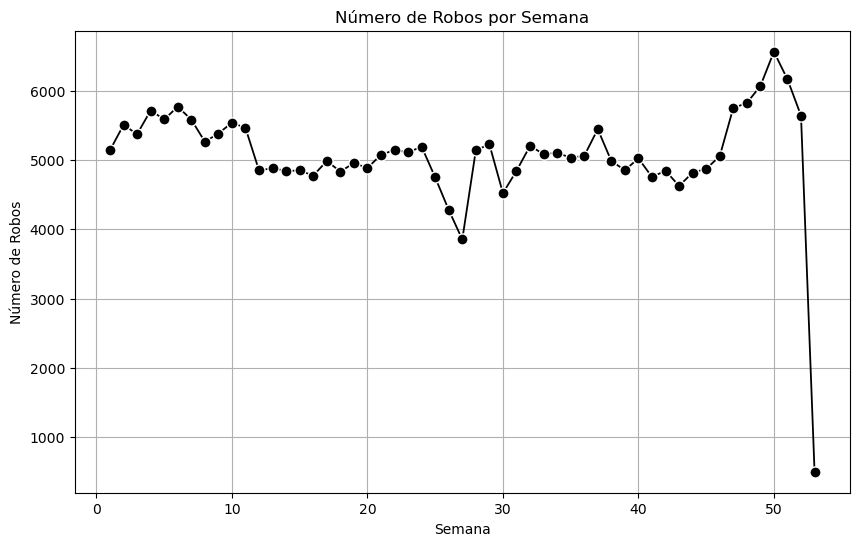

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
delitos['semana'] = delitos['fecha'].dt.isocalendar().week
# Agrega aquí tu lógica para obtener los datos semanales

semana_counts = delitos['semana'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(semana_counts.index, semana_counts.values, color='k', linewidth=1.3, marker='o', markersize=8, markeredgecolor='white')
ax.set_title('Número de Robos por Semana')
ax.set_xlabel('Semana')
ax.set_ylabel('Número de Robos')
ax.grid(True)
fig.show()


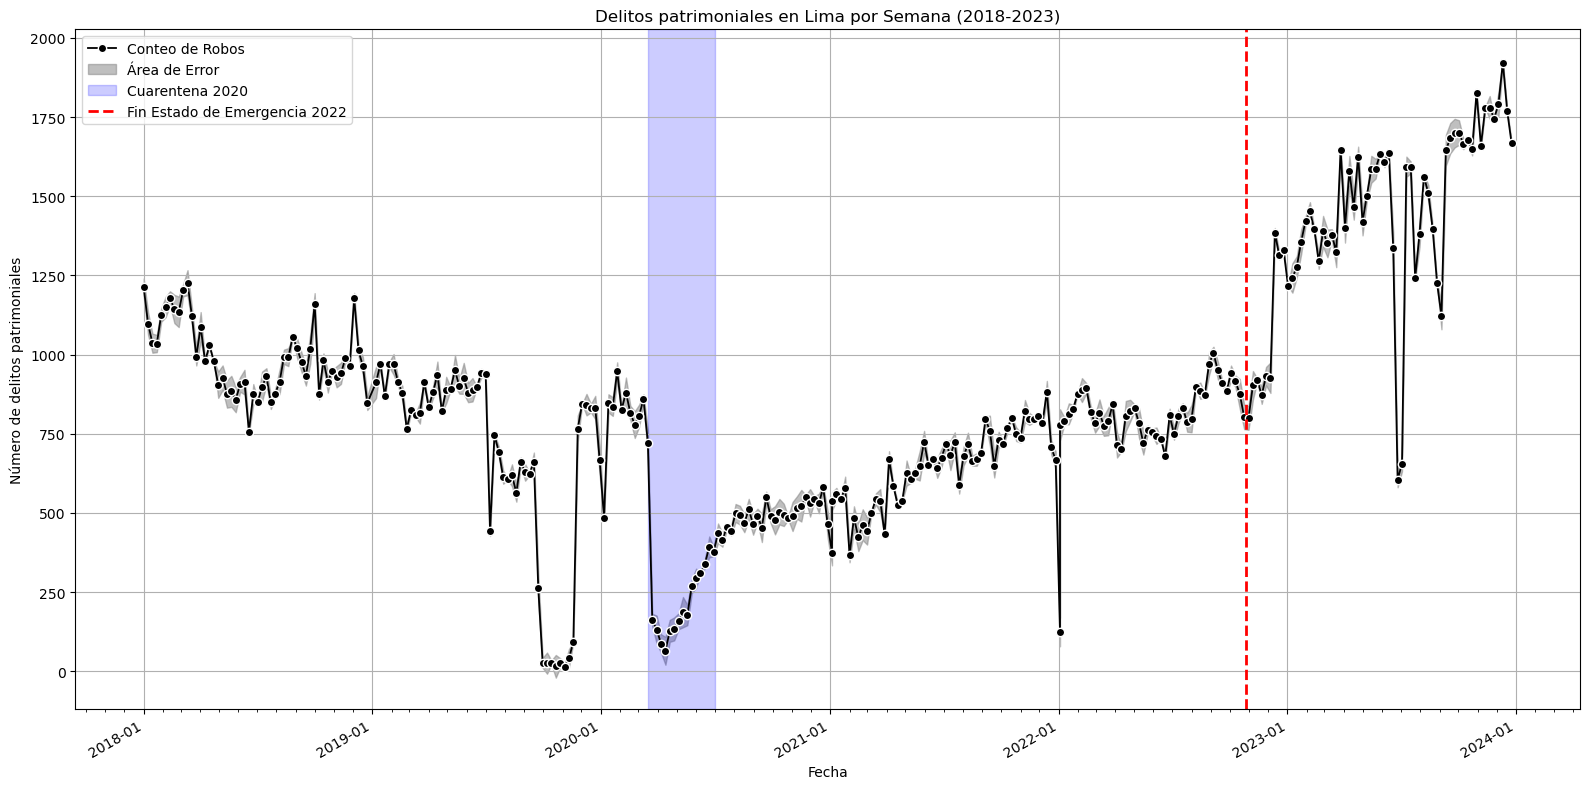

In [ ]:
# import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import pandas as pd
# import numpy as np

# # Supongamos que 'delitos' es tu DataFrame y ya tienes la columna 'fecha'
# delitos['semana'] = delitos['fecha'].dt.isocalendar().week
# delitos['anio'] = delitos['fecha'].dt.year

# Agrupar por año y semana y contar los robos
semana_counts = delitos.groupby(['anio', 'semana']).size().reset_index(name='conteo')

# Crear una columna de fecha que combine año y semana para el gráfico
semana_counts['fecha'] = semana_counts.apply(lambda x: pd.to_datetime(f'{int(x.anio)}-W{x.semana}-1', format="%Y-W%W-%w"), axis=1)

# Filtrar el rango de fechas de 2018 a 2023
semana_counts = semana_counts[(semana_counts['fecha'] >= '2018-01-01') & (semana_counts['fecha'] <= '2023-12-31')]

# Crear datos de ejemplo para las barras de error
np.random.seed(0)  # Para reproducibilidad
error = np.random.uniform(0, 50, size=len(semana_counts))

fig, ax = plt.subplots(figsize=(16, 8))

# Graficar los datos semanales
ax.plot(semana_counts['fecha'], semana_counts['conteo'], color='k', linewidth=1.3, marker='o', markersize=6, markeredgecolor='white', label='Conteo de Robos')

# Añadir áreas de error alrededor de la línea
ax.fill_between(semana_counts['fecha'],
                semana_counts['conteo'] - error,
                semana_counts['conteo'] + error,
                color='gray', alpha=0.5, label='Área de Error')

# Añadir área sombreada para la cuarentena
start_quarantine = pd.Timestamp('2020-03-16')
end_quarantine = pd.Timestamp('2020-07-01')
ax.axvspan(start_quarantine, end_quarantine, color='blue', alpha=0.2, label='Cuarentena 2020')

# Añadir línea vertical para el fin del estado de emergencia
end_emergency = pd.Timestamp('2022-10-27')
ax.axvline(end_emergency, color='red', linestyle='--', linewidth=2, label='Fin Estado de Emergencia 2022')

# Configuración de etiquetas y leyenda
ax.set_title('Delitos patrimoniales en Lima por Semana (2018-2023)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de delitos patrimoniales')
ax.grid(True)
ax.legend(loc='upper left')

# Mejorar formato del eje X
ax.xaxis.set_major_locator(mdates.YearLocator())  # Ubica una etiqueta cada año
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Ubica etiquetas menores cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato de fecha

fig.autofmt_xdate()  # Ajustar las fechas en el eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas

plt.show()


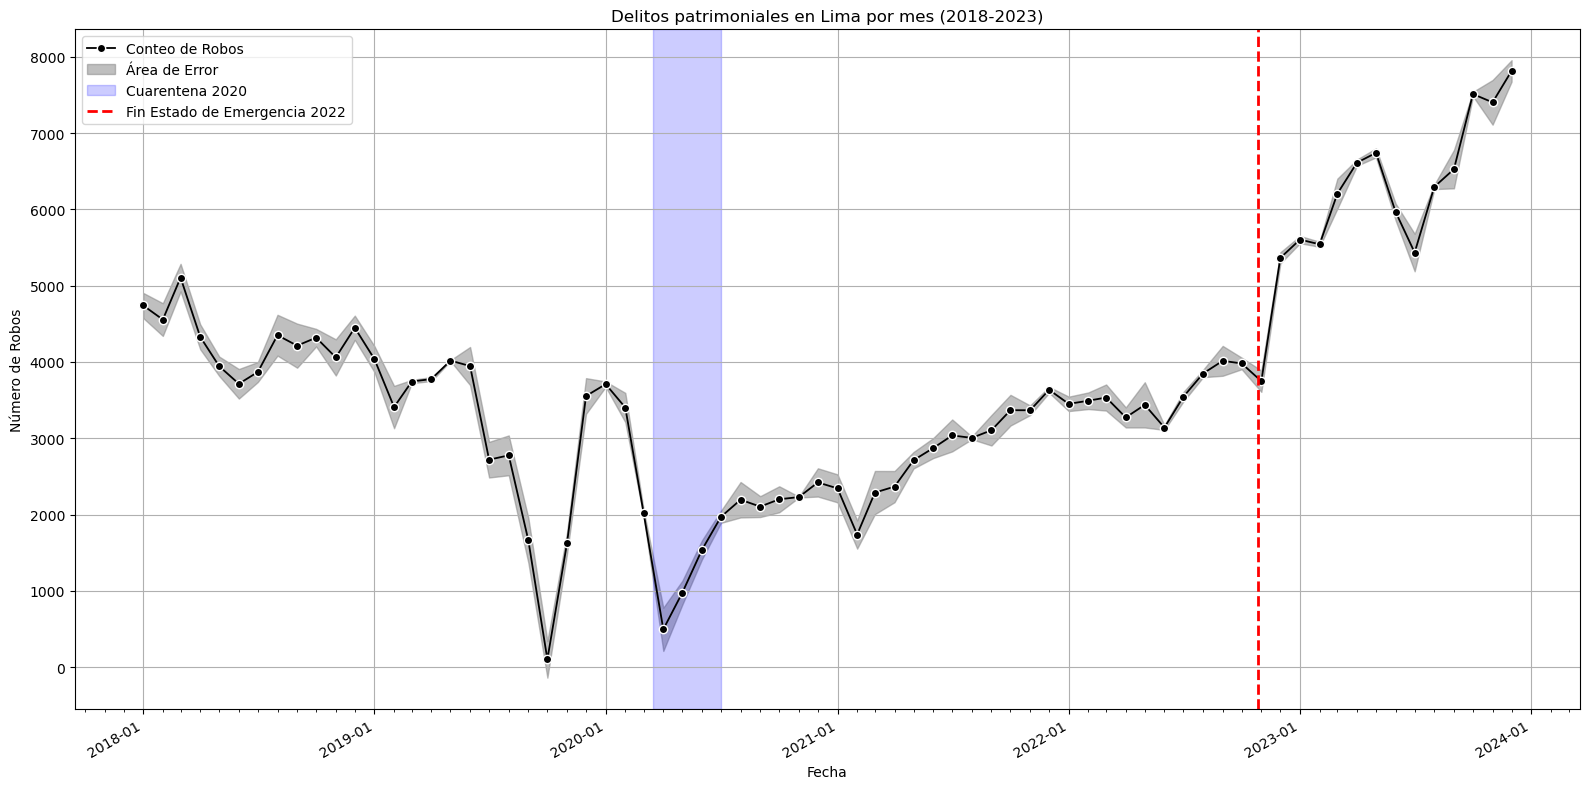

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd
# import numpy as np

# Supongamos que 'delitos' es tu DataFrame y ya tienes la columna 'fecha'
delitos['mes'] = delitos['fecha'].dt.to_period('M')  # Convertir fecha a periodo mensual
mensual_counts = delitos.groupby('mes').size().reset_index(name='conteo')
mensual_counts['fecha'] = mensual_counts['mes'].dt.to_timestamp()  # Convertir periodo a timestamp

# Filtrar el rango de fechas de 2018 a 2023
mensual_counts = mensual_counts[(mensual_counts['fecha'] >= '2018-01-01') & (mensual_counts['fecha'] <= '2023-12-31')]

# Crear datos de ejemplo para las barras de error
np.random.seed(0)  # Para reproducibilidad
error = np.random.uniform(0, 300, size=len(mensual_counts))

fig, ax = plt.subplots(figsize=(16, 8))  # Gráfico más ancho

# Graficar los datos mensuales
ax.plot(mensual_counts['fecha'], mensual_counts['conteo'], color='k', linewidth=1.3, marker='o', markersize=6, markeredgecolor='white', label='Conteo de Robos')

# Añadir áreas de error alrededor de la línea
ax.fill_between(mensual_counts['fecha'],
                mensual_counts['conteo'] - error,
                mensual_counts['conteo'] + error,
                color='gray', alpha=0.5, label='Área de Error')

# Añadir área sombreada para la cuarentena
start_quarantine = pd.Timestamp('2020-03-16')
end_quarantine = pd.Timestamp('2020-07-01')
ax.axvspan(start_quarantine, end_quarantine, color='blue', alpha=0.2, label='Cuarentena 2020')

# Añadir línea vertical para el fin del estado de emergencia
end_emergency = pd.Timestamp('2022-10-27')
ax.axvline(end_emergency, color='red', linestyle='--', linewidth=2, label='Fin Estado de Emergencia 2022')

# Configuración de etiquetas y leyenda
ax.set_title('Delitos patrimoniales en Lima por mes (2018-2023)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de Robos')
ax.grid(True)
ax.legend(loc='upper left')

# Mejorar formato del eje X
ax.xaxis.set_major_locator(mdates.YearLocator())  # Ubica una etiqueta cada año
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Ubica etiquetas menores cada mes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato de fecha

fig.autofmt_xdate()  # Ajustar las fechas en el eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas

plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21612\2440628370.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(mensual_counts['anio'].unique()))


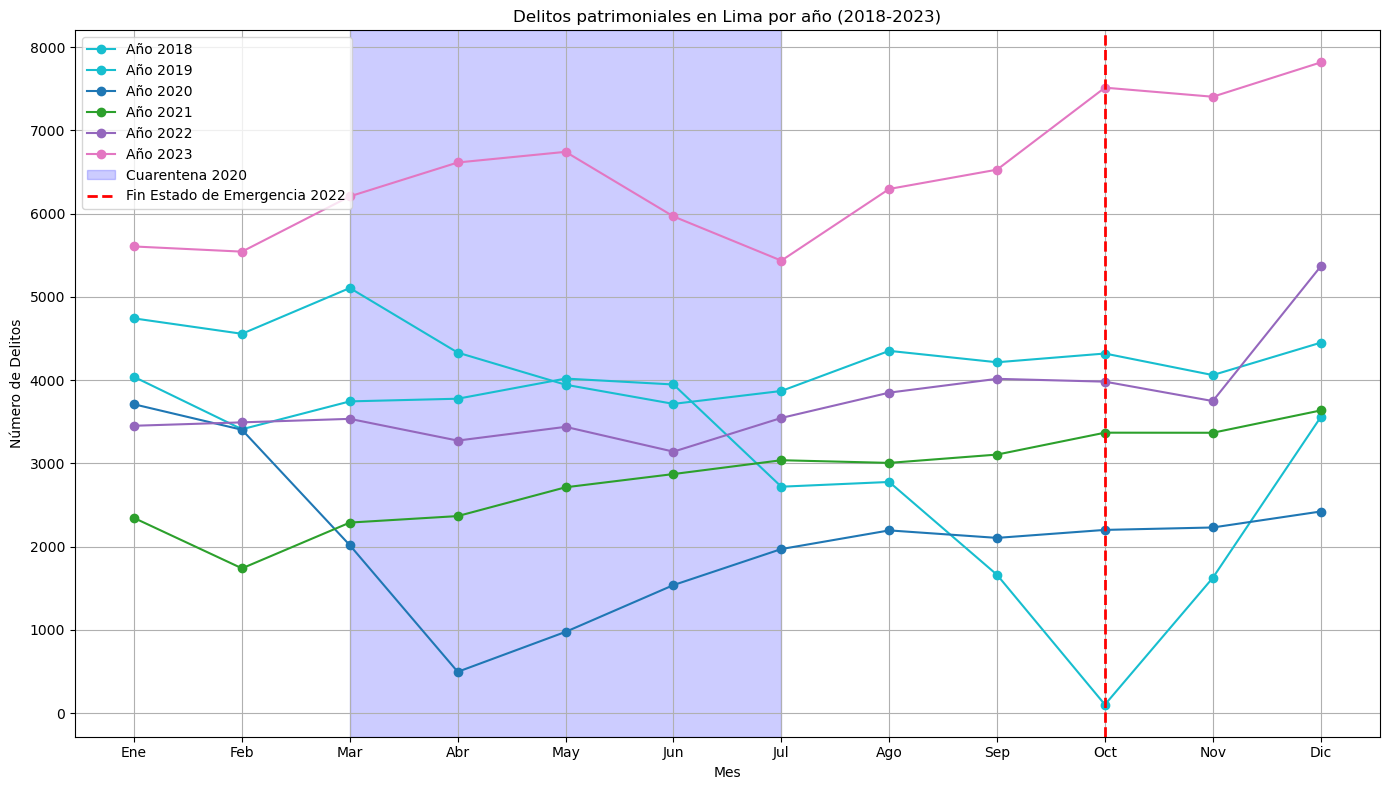

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# Supongamos que 'delitos' es tu DataFrame y ya tienes la columna 'fecha'
delitos['mes'] = delitos['fecha'].dt.month
delitos['anio'] = delitos['fecha'].dt.year

# Agrupar los datos por mes y año
mensual_counts = delitos.groupby(['anio', 'mes']).size().reset_index(name='conteo')

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Colores para cada año
colors = plt.cm.get_cmap('tab10', len(mensual_counts['anio'].unique()))

# Graficar los datos para cada año
for anio in mensual_counts['anio'].unique():
    data = mensual_counts[mensual_counts['anio'] == anio]
    ax.plot(data['mes'], data['conteo'], marker='o', markersize=6, label=f'Año {anio}', color=colors(anio % 10))

# Añadir áreas y líneas de referencia
start_quarantine = pd.Timestamp('2020-03-16').month
end_quarantine = pd.Timestamp('2020-07-01').month
ax.axvspan(start_quarantine, end_quarantine, color='blue', alpha=0.2, label='Cuarentena 2020')

end_emergency = pd.Timestamp('2022-10-27').month
ax.axvline(end_emergency, color='red', linestyle='--', linewidth=2, label='Fin Estado de Emergencia 2022')

# Configuración de etiquetas y leyenda
ax.set_title('Delitos patrimoniales en Lima por año (2018-2023)')
ax.set_xlabel('Mes')
ax.set_ylabel('Número de Delitos')
ax.set_xticks(range(1, 13))  # Meses del año
ax.set_xticklabels([
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
ax.grid(True)
ax.legend(loc='upper left')

plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21612\66363685.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("PuRd", 5)


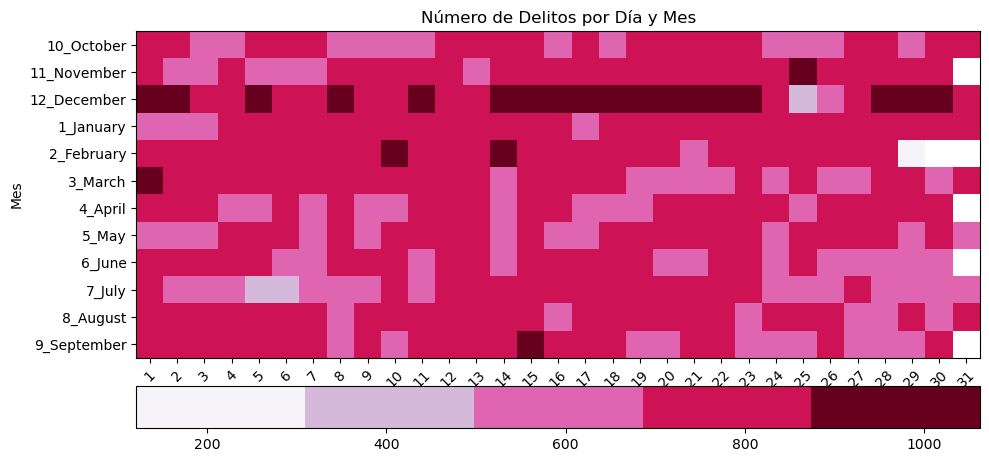

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import cm

# Supongamos que 'delitos' es tu DataFrame con las columnas 'dia', 'mes', 'anio' y 'conteo'
# Asegúrate de tener 'delitos' con datos adecuados en 'dia', 'mes', 'anio', y 'conteo'

# Crear una tabla pivot con días y meses, sumando los delitos para cada combinación
heatmap_data = delitos.groupby(['mes_text','dia'])['case'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='mes_text', columns='dia', values='case')

# Configuración del colormap
cmap = cm.get_cmap("PuRd", 5)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
cbar = ax.figure.colorbar(ax.imshow(heatmap_pivot, cmap=cmap), ax=ax, location='bottom', pad=0.05)

# Configurar los ticks y etiquetas
ax.set_xticks(range(len(heatmap_pivot.columns)))
ax.set_xticklabels(heatmap_pivot.columns, rotation=45)
ax.set_yticks(range(len(heatmap_pivot.index)))
ax.set_yticklabels(heatmap_pivot.index)

# Configurar la grilla
ax.grid(False)
ax.set_xlabel('Día')
ax.set_ylabel('Mes')
ax.set_title('Número de Delitos por Día y Mes')

plt.tight_layout()
plt.show()


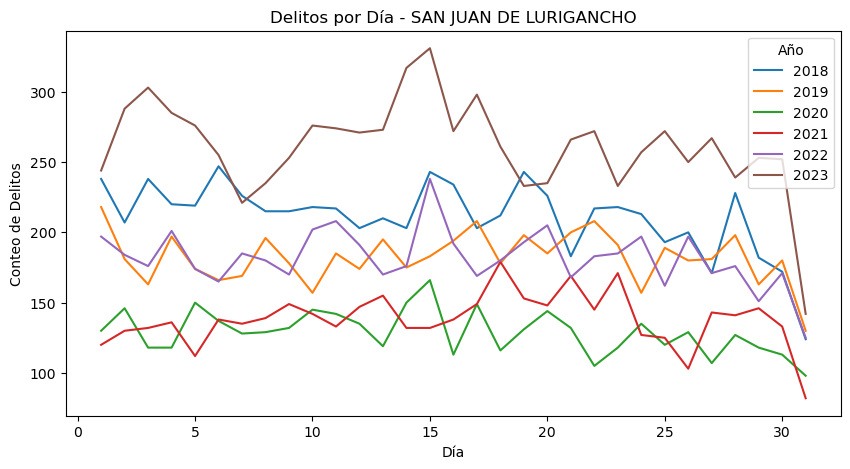

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Especifica el distrito que quieres seleccionar
distrito_seleccionado = 'SAN JUAN DE LURIGANCHO'  # Reemplaza 'NombreDelDistrito' por el nombre real del distrito

# Filtrar los datos por el distrito seleccionado
distrito_data = delitos[delitos['distrito'] == distrito_seleccionado].copy()

# Agrupar los datos por día y año, sumando los conteos
agrupados_dia = distrito_data.groupby(['dia', 'anio'])['case'].sum().unstack()

# Crear un gráfico para delitos por día
fig, ax = plt.subplots(figsize=(10, 5))
agrupados_dia.plot(ax=ax)

# Personalizar el gráfico
ax.set_title(f'Delitos por Día - {distrito_seleccionado}')
ax.set_xlabel('Día')
ax.set_ylabel('Conteo de Delitos')
ax.legend(title='Año')

# Mostrar el gráfico
plt.show()



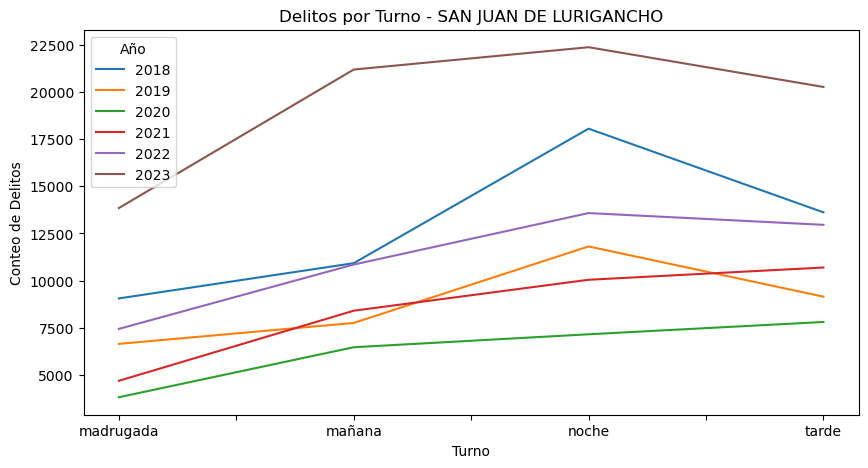

In [ ]:
# Agrupar los datos por turno y año, sumando los conteos
agrupados_turno = delitos.groupby(['turno', 'anio'])['case'].sum().unstack()

# Crear un gráfico para delitos por turno
fig, ax = plt.subplots(figsize=(10, 5))
agrupados_turno.plot(ax=ax)

# Personalizar el gráfico
ax.set_title(f'Delitos por Turno - {distrito_seleccionado}')
ax.set_xlabel('Turno')
ax.set_ylabel('Conteo de Delitos')
ax.legend(title='Año')

# Mostrar el gráfico
plt.show()



## Mining location
Let's use provincia: LIMA 2018-2023

### BY MONTH

In [ ]:
# Por año
indexList=['anio','provincia','distrito']
aggregator={'case':['sum']}
ByYearPlace=delitos.groupby(indexList,observed=True).agg(aggregator)

#long to wide
ByYearPlace.unstack()

case                                                \
                  sum                                                 
distrito        ANCON     ATE BARRANCO  BREÑA CARABAYLLO CHACLACAYO   
anio provincia                                                        
2018 LIMA       267.0  2974.0   1099.0  479.0      218.0      200.0   
2019 LIMA       298.0  1942.0   1050.0  414.0      181.0      102.0   
2020 LIMA       304.0  1094.0    202.0  350.0      109.0      129.0   
2021 LIMA       247.0  1360.0    354.0  499.0      223.0      168.0   
2022 LIMA       415.0  1821.0    921.0  409.0      270.0      200.0   
2023 LIMA       564.0  3117.0   1464.0  902.0      410.0      410.0   

                                                           ...  \
                                                           ...   
distrito       CHORRILLOS CIENEGUILLA   COMAS EL AGUSTINO  ...   
anio provincia                                             ...   
2018 LIMA          1404.0         NaN  3868.0       424.0  ...   
2019 LIMA           677.0         NaN  3262.0       387.0  ...   
2020 LIMA           470.0         1.0  2112.0       385.0  ...   
2021 LIMA           891.0         NaN  2611.0       319.0  ...   
2022 LIMA          2192.0         NaN  2797.0       383.0  ...   
2023 LIMA          3290.0         3.0  4664.0       578.0  ...   

                                                                     \
                                                                      
distrito       SAN JUAN DE MIRAFLORES SAN LUIS SAN MARTIN DE PORRES   
anio provincia                                                        
2018 LIMA                       192.0     71.0               5787.0   
2019 LIMA                       217.0     78.0               2870.0   
2020 LIMA                       126.0     93.0               1942.0   
2021 LIMA                       116.0    116.0               2312.0   
2022 LIMA                       143.0    159.0               4487.0   
2023 LIMA                       348.0    262.0               8139.0   

                                                                              \
                                                                               
distrito       SAN MIGUEL SANTA ANITA SANTA ROSA SANTIAGO DE SURCO SURQUILLO   
anio provincia                                                                 
2018 LIMA           269.0      2267.0      101.0            2153.0     958.0   
2019 LIMA           216.0      1854.0       83.0            1369.0     309.0   
2020 LIMA           253.0       678.0       72.0             737.0     822.0   
2021 LIMA           474.0      1195.0       53.0            1216.0    1652.0   
2022 LIMA           411.0      1449.0       91.0            2126.0     868.0   
2023 LIMA           831.0      2750.0      124.0            3153.0    1776.0   

                                                          
                                                          
distrito       VILLA EL SALVADOR VILLA MARIA DEL TRIUNFO  
anio provincia                                            
2018 LIMA                    6.0                   710.0  
2019 LIMA                    6.0                   740.0  
2020 LIMA                    2.0                   503.0  
2021 LIMA                    1.0                   559.0  
2022 LIMA                   16.0                   906.0  
2023 LIMA                   84.0                  1407.0  

[6 rows x 42 columns]

In [ ]:
# Por año y turnos
indexList=['anio','provincia','distrito','turno_text']
aggregator={'case':['sum']}
ByYearPlace_turno=delitos.groupby(indexList,observed=True).agg(aggregator)

#long to wide
ByYearPlace_turno.unstack()

case                           
                                           sum                           
turno_text                             2_noche 3_tarde 4_madrugada mañana
anio provincia distrito                                                  
2018 LIMA      ANCON                      86.0    70.0        65.0   46.0
               ATE                      1000.0   782.0       618.0  574.0
               BARRANCO                  352.0   237.0       304.0  206.0
               BREÑA                     172.0   146.0        70.0   91.0
               CARABAYLLO                 76.0    54.0        48.0   40.0
...                                        ...     ...         ...    ...
2023 LIMA      SANTA ROSA                 39.0    35.0        21.0   29.0
               SANTIAGO DE SURCO         937.0  1013.0       366.0  837.0
               SURQUILLO                 507.0   488.0       225.0  556.0
               VILLA EL SALVADOR          10.0     6.0        56.0   12.0
               VILLA MARIA DEL TRIUNFO   462.0   306.0       255.0  384.0

[236 rows x 4 columns]

In [ ]:
# no missing values
# ByYearPlace_wide=ByYearPlace.unstack().fillna(0)
# ByYearPlace_wide

### BY MONTH

In [ ]:
# Por mes
indexList=['anio','mes_text','provincia','distrito']
aggregator={'case':['sum']}
ByMonthPlace=delitos.groupby(indexList,observed=True).agg(aggregator)
#long to wide
ByMonthPlace.unstack()

case                                              \
                             sum                                               
distrito                   ANCON    ATE BARRANCO BREÑA CARABAYLLO CHACLACAYO   
anio mes_text    provincia                                                     
2018 10_October  LIMA       31.0  265.0     93.0  41.0       26.0        9.0   
     11_November LIMA       22.0  223.0     88.0  38.0       29.0       29.0   
     12_December LIMA       27.0  296.0    125.0  50.0       29.0       24.0   
     1_January   LIMA       34.0  272.0     59.0  52.0        8.0       14.0   
     2_February  LIMA       24.0  280.0     95.0  44.0        9.0       10.0   
...                          ...    ...      ...   ...        ...        ...   
2023 5_May       LIMA       32.0  287.0    110.0  65.0       39.0       40.0   
     6_June      LIMA       35.0  260.0    113.0  77.0       29.0       31.0   
     7_July      LIMA       47.0  246.0     87.0  52.0       22.0       32.0   
     8_August    LIMA       46.0  215.0    119.0  63.0       20.0       27.0   
     9_September LIMA       44.0  244.0    108.0  92.0       33.0       37.0   

                                                                      ...  \
                                                                      ...   
distrito                   CHORRILLOS CIENEGUILLA  COMAS EL AGUSTINO  ...   
anio mes_text    provincia                                            ...   
2018 10_October  LIMA           120.0         NaN  355.0        52.0  ...   
     11_November LIMA           109.0         NaN  350.0        45.0  ...   
     12_December LIMA            60.0         NaN  340.0        39.0  ...   
     1_January   LIMA           115.0         NaN  305.0        30.0  ...   
     2_February  LIMA           120.0         NaN  372.0        31.0  ...   
...                               ...         ...    ...         ...  ...   
2023 5_May       LIMA           312.0         NaN  400.0        59.0  ...   
     6_June      LIMA           303.0         1.0  349.0        45.0  ...   
     7_July      LIMA           173.0         NaN  314.0        53.0  ...   
     8_August    LIMA           211.0         1.0  383.0        57.0  ...   
     9_September LIMA           261.0         NaN  361.0        57.0  ...   

                                                            \
                                                             
distrito                   SAN JUAN DE MIRAFLORES SAN LUIS   
anio mes_text    provincia                                   
2018 10_October  LIMA                        21.0      4.0   
     11_November LIMA                        15.0     11.0   
     12_December LIMA                        20.0      5.0   
     1_January   LIMA                        16.0      5.0   
     2_February  LIMA                        17.0      4.0   
...                                           ...      ...   
2023 5_May       LIMA                        31.0     22.0   
     6_June      LIMA                        22.0     21.0   
     7_July      LIMA                        24.0     19.0   
     8_August    LIMA                        23.0     20.0   
     9_September LIMA                        35.0     20.0   

                                                                        \
                                                                         
distrito                   SAN MARTIN DE PORRES SAN MIGUEL SANTA ANITA   
anio mes_text    provincia                                               
2018 10_October  LIMA                     440.0       19.0       109.0   
     11_November LIMA                     427.0       20.0       131.0   
     12_December LIMA                     374.0       38.0       173.0   
     1_January   LIMA                     507.0       17.0       306.0   
     2_February  LIMA                     537.0       13.0       295.0   
...                                         ...        ...         ...   


In [ ]:
# Por mes
indexList=['anio','mes_text','provincia','distrito','turno_text']
aggregator={'case':['sum']}
ByMonthPlace=delitos.groupby(indexList,observed=True).agg(aggregator)
#long to wide
ByMonthPlace.unstack()

case          \
                                                       sum           
turno_text                                         2_noche 3_tarde   
anio mes_text    provincia distrito                                  
2018 10_October  LIMA      ANCON                      17.0     5.0   
                           ATE                        76.0    76.0   
                           BARRANCO                   37.0    16.0   
                           BREÑA                      14.0     8.0   
                           CARABAYLLO                  7.0     8.0   
...                                                    ...     ...   
2023 9_September LIMA      SANTA ROSA                  4.0     3.0   
                           SANTIAGO DE SURCO          94.0    96.0   
                           SURQUILLO                  41.0    47.0   
                           VILLA EL SALVADOR           1.0     NaN   
                           VILLA MARIA DEL TRIUNFO    44.0    23.0   

                                                                       
                                                                       
turno_text                                         4_madrugada mañana  
anio mes_text    provincia distrito                                    
2018 10_October  LIMA      ANCON                           6.0    3.0  
                           ATE                            57.0   56.0  
                           BARRANCO                       24.0   16.0  
                           BREÑA                          10.0    9.0  
                           CARABAYLLO                      6.0    5.0  
...                                                        ...    ...  
2023 9_September LIMA      SANTA ROSA                      NaN    1.0  
                           SANTIAGO DE SURCO              25.0   77.0  
                           SURQUILLO                      10.0   36.0  
                           VILLA EL SALVADOR               1.0    NaN  
                           VILLA MARIA DEL TRIUNFO        19.0   24.0  

[2593 rows x 4 columns]

### BY DAY

In [ ]:

indexList=['anio','dia','provincia','distrito']
aggregator={'case':['sum']}
ByDayPlace=delitos.groupby(indexList,observed=True).agg(aggregator)
#long to wide
ByDayPlace.unstack()

case                                              \
                     sum                                               
distrito           ANCON    ATE BARRANCO BREÑA CARABAYLLO CHACLACAYO   
anio dia provincia                                                     
2018 1   LIMA       14.0   91.0     46.0  27.0        5.0        9.0   
     2   LIMA        8.0  125.0     32.0  17.0        2.0        8.0   
     3   LIMA       16.0   98.0     41.0  17.0        2.0        6.0   
     4   LIMA        4.0   91.0     30.0  12.0        6.0        8.0   
     5   LIMA        9.0   99.0     36.0  15.0       10.0        8.0   
...                  ...    ...      ...   ...        ...        ...   
2023 27  LIMA       14.0   74.0     38.0  22.0       11.0       11.0   
     28  LIMA       16.0   93.0     62.0  33.0       13.0        5.0   
     29  LIMA       15.0   92.0     40.0  34.0       12.0       17.0   
     30  LIMA       22.0   77.0     41.0  25.0       10.0       14.0   
     31  LIMA       15.0   54.0     29.0  13.0        9.0       11.0   

                                                              ...  \
                                                              ...   
distrito           CHORRILLOS CIENEGUILLA  COMAS EL AGUSTINO  ...   
anio dia provincia                                            ...   
2018 1   LIMA            42.0         NaN  145.0        10.0  ...   
     2   LIMA            59.0         NaN  129.0        15.0  ...   
     3   LIMA            40.0         NaN  133.0        14.0  ...   
     4   LIMA            46.0         NaN  117.0        19.0  ...   
     5   LIMA            42.0         NaN  156.0        15.0  ...   
...                       ...         ...    ...         ...  ...   
2023 27  LIMA           105.0         NaN  138.0        14.0  ...   
     28  LIMA           120.0         NaN  138.0        25.0  ...   
     29  LIMA           124.0         NaN  127.0        21.0  ...   
     30  LIMA           100.0         NaN  147.0        13.0  ...   
     31  LIMA            62.0         NaN   85.0        11.0  ...   

                                                                         \
                                                                          
distrito           SAN JUAN DE MIRAFLORES SAN LUIS SAN MARTIN DE PORRES   
anio dia provincia                                                        
2018 1   LIMA                         8.0      4.0                214.0   
     2   LIMA                         1.0      4.0                172.0   
     3   LIMA                         7.0      1.0                180.0   
     4   LIMA                         8.0      5.0                203.0   
     5   LIMA                         4.0      2.0                192.0   
...                                   ...      ...                  ...   
2023 27  LIMA                        16.0     14.0                239.0   
     28  LIMA                        11.0     12.0                259.0   
     29  LIMA                        15.0     13.0                208.0   
     30  LIMA                        12.0      8.0                235.0   
     31  LIMA                         6.0      4.0                171.0   

                                                                        \
                                                                         
distrito           SAN MIGUEL SANTA ANITA SANTA ROSA SANTIAGO DE SURCO   
anio dia provincia                                                       
2018 1   LIMA             7.0        87.0        2.0              82.0   
     2   LIMA             7.0        92.0        2.0              83.0   
     3   LIMA             8.0        81.0        2.0              66.0   
     4   LIMA            13.0        65.0        1.0              69.0   
     5   LIMA            10.0        93.0        2.0              82.0   
...                       ...         ...        ...               ...   
2023 27  LIMA            23.0        

In [ ]:

indexList=['anio','dia','provincia','distrito','turno_text']
aggregator={'case':['sum']}
ByDayPlace=delitos.groupby(indexList,observed=True).agg(aggregator)
#long to wide
ByDayPlace.unstack()

case                           
                                               sum                           
turno_text                                 2_noche 3_tarde 4_madrugada mañana
anio dia provincia distrito                                                  
2018 1   LIMA      ANCON                       5.0     1.0         4.0    4.0
                   ATE                        29.0    22.0        25.0   15.0
                   BARRANCO                   17.0     6.0        17.0    6.0
                   BREÑA                       9.0     7.0         6.0    5.0
                   CARABAYLLO                  2.0     2.0         NaN    1.0
...                                            ...     ...         ...    ...
2023 31  LIMA      SANTA ANITA                13.0     9.0        11.0   13.0
                   SANTA ROSA                  1.0     NaN         1.0    NaN
                   SANTIAGO DE SURCO          19.0    26.0         5.0   19.0
                   SURQUILLO                  14.0     9.0         3.0   10.0
                   VILLA MARIA DEL TRIUNFO     8.0    13.0         8.0    6.0

[6543 rows x 4 columns]

### Para los distritos por años y delitos patrimoniales

- Especial enfasis en 2023 porque ahí aumentaron los robos en las mañanas
- En los años anteriores los robos ocurrían mayormente en las noches y en las tardes

In [ ]:
# Solo las frecuencias de los distritos de la provincia de LIMA
sumCases=ByYearPlace.sum(axis=1)
sumCases

anio  provincia  distrito               
2018  LIMA       ANCON                       267
                 ATE                        2974
                 BARRANCO                   1099
                 BREÑA                       479
                 CARABAYLLO                  218
                                            ... 
2023  LIMA       SANTA ROSA                  124
                 SANTIAGO DE SURCO          3153
                 SURQUILLO                  1776
                 VILLA EL SALVADOR            84
                 VILLA MARIA DEL TRIUNFO    1407
Length: 236, dtype: int64

## Mil casos

- Luego de revisar la data graficamente identificamos distritos en los que el delito se mantiene por debajo de los mil delitos
- Cuáles son los factores que explican que estos distritos hayan manejado relativamente bien los delitos patrimoniales durante estos años?

In [ ]:
import pandas as pd

# Filtrar los datos para el rango de años de interés
delitos_filtrados = delitos[(delitos['anio'] >= 2018) & (delitos['anio'] <= 2023)]

# Sumar delitos por distrito y filtrar distritos con menos de 1000 delitos
distritos_menor_1000 = delitos_filtrados.groupby('distrito')['case'].sum()
distritos_menor_1000 = distritos_menor_1000[distritos_menor_1000 < 1000].index

# Filtrar el DataFrame original para incluir solo los distritos con menos de 1000 delitos
delitos_menor_1000 = delitos_filtrados[delitos_filtrados['distrito'].isin(distritos_menor_1000)]

# Verificar el resultado
print(delitos_menor_1000.head())



                                    coordenadas    latitud   longitud  \
7017  [-76.99894889999996, -12.060522299999946] -12.060522 -76.998949   
7018  [-76.99920149999997, -12.060538299999962] -12.060538 -76.999201   
7019  [-76.99920149999997, -12.060538299999962] -12.060538 -76.999201   
7020  [-76.99920149999997, -12.060538299999962] -12.060538 -76.999201   
7021  [-76.99920149999997, -12.060538299999962] -12.060538 -76.999201   

          fecha nombre_dia nombre_mes        tiempo  anio  mes  dia  ...  \
7017 2022-03-31   Thursday      March  1.648685e+12  2022    3   31  ...   
7018 2023-10-30     Monday    October  1.698624e+12  2023   10   30  ...   
7019 2023-11-21    Tuesday   November  1.700525e+12  2023   11   21  ...   
7020 2023-11-22  Wednesday   November  1.700611e+12  2023   11   22  ...   
7021 2023-11-27     Monday   November  1.701043e+12  2023   11   27  ...   

     subtipo       modalidad macroregion region_pol  ubigeo case turno_text  \
7017   HURTO  HURTO AGRAV

In [ ]:
#delitos_menor_mil.info()
unique_dis = delitos_menor_1000['distrito'].unique()

# Mostrar los valores únicos
print(unique_dis)

['SAN LUIS' 'PUCUSANA' 'INDEPENDENCIA' 'SANTA ROSA' 'PUEBLO LIBRE'
 'CIENEGUILLA' 'LURIN' 'VILLA EL SALVADOR' 'PUNTA HERMOSA' 'PUNTA NEGRA'
 'SAN BARTOLO']


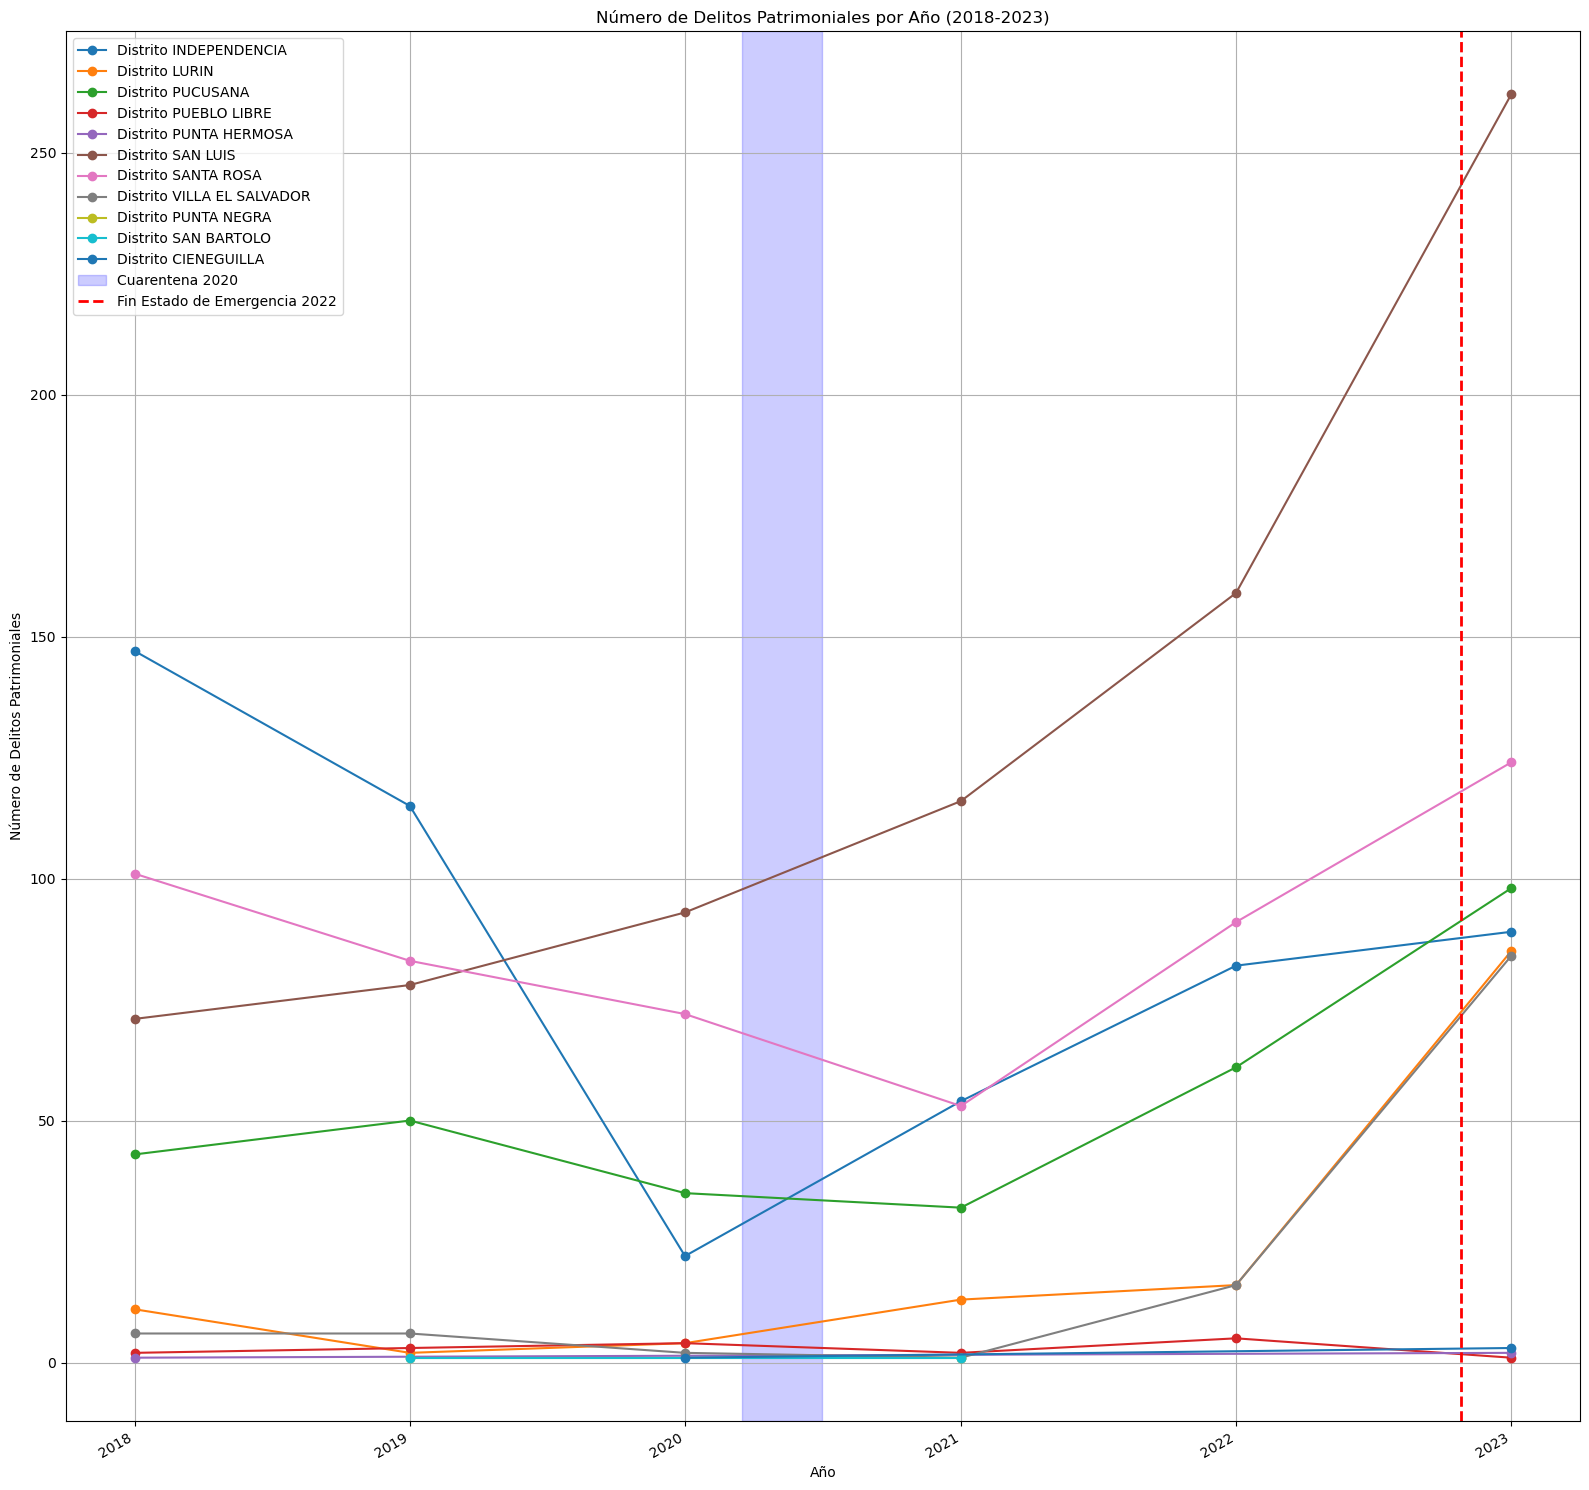

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Contar delitos por año y distrito
anual_counts = delitos_menor_1000.groupby(['anio', 'distrito']).size().reset_index(name='conteo')

# Convertir anio a tipo datetime para el gráfico
anual_counts['fecha'] = pd.to_datetime(anual_counts['anio'].astype(str) + '-01-01')

# Filtrar el rango de fechas de 2018 a 2023
anual_counts = anual_counts[(anual_counts['fecha'] >= '2018-01-01') & (anual_counts['fecha'] <= '2023-12-31')]

# Crear datos de ejemplo para las barras de error (esto es opcional)
np.random.seed(0)  # Para reproducibilidad
anual_counts['error'] = np.random.uniform(0, 300, size=len(anual_counts))

# Crear gráfico
fig, ax = plt.subplots(figsize=(16, 15))  # Gráfico más ancho

# Graficar los datos anuales para cada distrito
for distrito in anual_counts['distrito'].unique():
    data_distrito = anual_counts[anual_counts['distrito'] == distrito]
    ax.plot(data_distrito['fecha'], data_distrito['conteo'], marker='o', label=f'Distrito {distrito}')

# Añadir área sombreada para la cuarentena
start_quarantine = pd.Timestamp('2020-03-16')
end_quarantine = pd.Timestamp('2020-07-01')
ax.axvspan(start_quarantine, end_quarantine, color='blue', alpha=0.2, label='Cuarentena 2020')

# Añadir línea vertical para el fin del estado de emergencia
end_emergency = pd.Timestamp('2022-10-27')
ax.axvline(end_emergency, color='red', linestyle='--', linewidth=2, label='Fin Estado de Emergencia 2022')

# Configuración de etiquetas y leyenda
ax.set_title('Número de Delitos Patrimoniales por Año (2018-2023)')
ax.set_xlabel('Año')
ax.set_ylabel('Número de Delitos Patrimoniales')
ax.grid(True)
ax.legend(loc='upper left')

# Ajustar formato del eje X para que muestre los años
ax.xaxis.set_major_locator(mdates.YearLocator())  # Ubica una etiqueta cada año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año

fig.autofmt_xdate()  # Ajustar las fechas en el eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas

plt.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Contar delitos por año y distrito
anual_counts = delitos_menor_1000.groupby(['anio', 'distrito']).size().reset_index(name='conteo')

# Convertir anio a tipo datetime para el gráfico
anual_counts['fecha'] = pd.to_datetime(anual_counts['anio'].astype(str) + '-01-01')

# Filtrar el rango de fechas de 2018 a 2023
anual_counts = anual_counts[(anual_counts['fecha'] >= '2018-01-01') & (anual_counts['fecha'] <= '2023-12-31')]

# Crear la figura de Plotly
fig = go.Figure()

# Graficar los datos anuales para cada distrito
for distrito in anual_counts['distrito'].unique():
    data_distrito = anual_counts[anual_counts['distrito'] == distrito]
    fig.add_trace(go.Scatter(
        x=data_distrito['fecha'],
        y=data_distrito['conteo'],
        mode='lines+markers',
        name=f'Distrito {distrito}'
    ))

# Añadir área sombreada para la cuarentena
start_quarantine = pd.Timestamp('2020-03-16')
end_quarantine = pd.Timestamp('2020-07-01')
fig.add_vrect(
    x0=start_quarantine, x1=end_quarantine,
    fillcolor="blue", opacity=0.2,
    layer="below", line_width=0,
    name="Cuarentena 2020"
)

# Añadir línea vertical para el fin del estado de emergencia
end_emergency = pd.Timestamp('2022-10-27')
fig.add_vline(
    x=end_emergency,
    line=dict(color="red", width=2, dash="dash"),
    name="Fin Estado de Emergencia 2022"
)

# Configuración de etiquetas y leyenda
fig.update_layout(
    title='Número de Delitos Patrimoniales por Año (2018-2023)',
    xaxis_title='Año',
    yaxis_title='Número de Delitos Patrimoniales',
    xaxis_tickangle=-45,  # Ángulo de las etiquetas del eje x
    xaxis=dict(
        tickformat='%Y',
        tickvals=pd.date_range(start='2018-01-01', end='2023-12-31', freq='A').to_pydatetime(),
    ),
    legend_title='Distritos',
    template='plotly_white',
    height=1000,  # Altura de la gráfica
    width=1500 # Ancho de la gráfica
)

# Mostrar el gráfico
fig.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21612\4264108037.py:53: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.




- Considerar limpiar la data json de nuevo en python desde cero.
- Pintar coropletas de los distritos en Lima luego
- Revisar la variable dia y pasarlo a dia texto porque tiene el formato 30 o 31
- La variable tiempo es la fecha en otro formato
- Haremos graficas y el reporte en html en base a las recomendaciones de wheleer
- Haremos todo lo de arriba
- Haremos coropletas solo de Lima